### 0. 데이터셋 설명(대중교통 이용 교통카드 통계자료)
   + T-money의 교통카드 이용통계를 통해 서울시의 버스정류장, 지하철 역별로 승차 승객수와 하차 승객수를 알 수 있는 데이터셋이다.
   + 해당 데이터셋은 선/후불 교통카드 및 1회용 교통카드 기준으로 승/하차 기준을 산출한다.
   + 지하철 이용 통계는 서울교통공사, 한국철도공사, 공항철도에 속한 노선과 9호선에 대한 이용 정보를 포함한다.
   + 버스 이용 통계는 서울버스와 서울마을버스의 이용 정보를 포함한다.
   + 코로나 이전과 이후 비교를 위해 12주차 과제와 동일하게 2019년 1월 ~ 2020년 12월의 데이터셋을 활용한다.

In [1]:
from pathlib import Path
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

### 1. 대중교통의 주요 정류장/역별 이용 현황
   + '현황'은 일이 되어가는 현재의 과정이나 형편을 뜻한다.
   + 버스/지하철의 이용현황을 파악하기 위해, 주어진 데이터 셋중 가장 최근의 데이터셋인 2020년 12월의 이용 현황을 파악한다.
   + 데이터 파일의 1번 시트는 버스정류장별 이용현황, 2번 시트는 지하철 노선별 역별 이용현황을 포함한다.

In [27]:
df_2020_12_bus = pd.read_excel('Final_exam_Dataset/2020년 12월  교통카드 통계자료.xls',
                              sheet_name = '버스정류장별 이용현황')
df_2020_12_bus

,사용월,노선ID,노선번호,노선명,버스정류장ID,버스정류장명,승차승객수,하차승객수,작업일시
0,2020-12,11110897,0017,0017번(청암동~이촌동),1,청암자이아파트,354,7,2021-01-03 09:36:40
1,2020-12,11110897,0017,0017번(청암동~이촌동),2,청암동강변삼성아파트,"1,219",23,2021-01-03 09:36:40
2,2020-12,11110897,0017,0017번(청암동~이촌동),3,청심경로당,"2,201",17,2021-01-03 09:36:40
3,2020-12,11110897,0017,0017번(청암동~이촌동),4,원효2동주민센터,"3,631",79,2021-01-03 09:36:40
4,2020-12,11110897,0017,0017번(청암동~이촌동),5,산천동,"4,552",186,2021-01-03 09:36:40
...,...,...,...,...,...,...,...,...,...
38999,2020-12,11110729,중랑02,중랑02(진로아파트~한신아파트),22,서일대정문,8,57,2021-01-03 09:36:40
39000,2020-12,11110729,중랑02,중랑02(진로아파트~한신아파트),23,새마을금고,69,888,2021-01-03 09:36:40
39001,2020-12,11110729,중랑02,중랑02(진로아파트~한신아파트),24,공판장,1,845,2021-01-03 09:36:40
39002,2020-12,11110729,중랑02,중랑02(진로아파트~한신아파트),25,진주빌라.바다약국,3,"1,160",2021-01-03 09:36:40


In [22]:
df_2020_12_sub = pd.read_excel('Final_exam_Dataset/2020년 12월  교통카드 통계자료.xls',
                              sheet_name = '지하철 노선별 역별 이용현황')
df_2020_12_sub

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2020-12,1호선,1,서울역,"842,346","797,546",2021-01-03 09:36:40
1,2020-12,1호선,10,동묘앞,"208,719","214,534",2021-01-03 09:36:40
2,2020-12,1호선,2,시청,"429,145","423,621",2021-01-03 09:36:40
3,2020-12,1호선,3,종각,"667,792","642,037",2021-01-03 09:36:40
4,2020-12,1호선,4,종로3가,"493,106","450,421",2021-01-03 09:36:40
...,...,...,...,...,...,...,...
598,2020-12,우이신설선,705,북한산보국문,"126,781","124,337",2021-01-03 09:36:40
599,2020-12,우이신설선,706,정릉,"96,501","92,058",2021-01-03 09:36:40
600,2020-12,우이신설선,707,성신여대입구(돈암),"65,933","71,709",2021-01-03 09:36:40
601,2020-12,우이신설선,708,보문,"33,909","34,610",2021-01-03 09:36:40


   + 대중교통 이용 현황은 승차승객수와 하차승객수의 합이다.
   + 버스, 지하철 별로 필요한 컬럼만을 가공하고, 같은 정류장, 지하철 역은 그룹화 하여 피봇테이블로 나타낸다.

In [28]:
for i in range(len(df_2020_12_bus)):
    df_2020_12_bus['승차승객수'][i] = int(df_2020_12_bus['승차승객수'][i].replace(',',''))+int(df_2020_12_bus['하차승객수'][i].replace(',',''))
df_2020_12_bus.rename(columns = {'승차승객수':'이용승객수'}, inplace = True)
df_2020_12_bus = df_2020_12_bus[['버스정류장명','이용승객수']]
df_2020_12_bus = df_2020_12_bus.groupby(['버스정류장명']).sum()
df_2020_12_bus

,이용승객수
버스정류장명,
(구)법화사,839
11단지,6048
123전자타운.2001아울렛,26274
12번지건영아파트,15228
13단지아파트입구,10189
...,...
힐스테이트송파.송파더센트레,5800
힐스테이트신촌.신촌푸르지오1단지후문,12854
힐스테이트입구,2471


In [23]:
for i in range(len(df_2020_12_sub)):
    df_2020_12_sub['승차승객수'][i] = int(df_2020_12_sub['승차승객수'][i].replace(',',''))+int(df_2020_12_sub['하차승객수'][i].replace(',',''))
df_2020_12_sub.rename(columns = {'승차승객수':'이용승객수'}, inplace = True)
df_2020_12_sub = df_2020_12_sub[['지하철역','이용승객수']]
df_2020_12_sub = df_2020_12_sub.groupby(['지하철역']).sum()
df_2020_12_sub

,이용승객수
지하철역,
4.19민주묘지,121940
가능,283817
가락시장,761665
가산디지털단지,2759471
가양,859777
...,...
회기,1001485
회룡,539812
회현(남대문시장),991103


   + 주요 버스정류장/지하철역은 이용승객수가 가장 많은 상위 10개의 버스정류장/지하철역으로 한다.

In [47]:
df_2020_12_bus = df_2020_12_bus.sort_values(by = '이용승객수', ascending = False)[:10]
df_2020_12_bus

,이용승객수
노선번호,
143,1432630
152,1431924
160,1392571
130,1361218
303,1276285
153,1263838
272,1253421
146,1185358
147,1158188


In [31]:
df_2020_12_sub = df_2020_12_sub.sort_values(by = '이용승객수', ascending = False)[:10]
df_2020_12_sub

,이용승객수
지하철역,
잠실(송파구청),3314843
강남,3167883
고속터미널,2908440
선릉,2837243
신림,2799927
가산디지털단지,2759471
서울역,2729257
구로디지털단지,2598153
사당,2478816


   + 대중교통의 주요 정류장, 역별 현황을 막대그래프로 시각화 하면 아래와 같다.

Text(0.5, 0, '버스정류장')

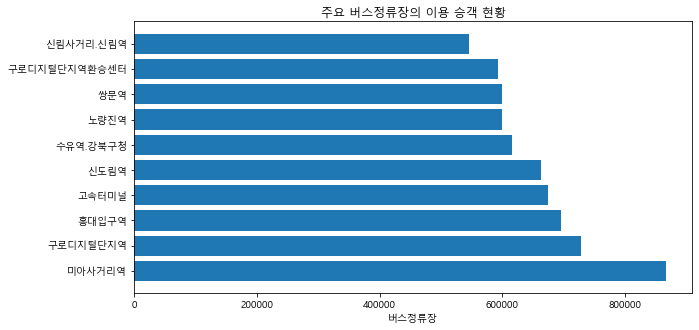

In [40]:
plt.rcParams['font.family'] = 'Malgun Gothic'
fig = plt.figure(figsize = (10,5))
plt.barh(list(df_2020_12_bus.index),
        list(df_2020_12_bus['이용승객수']))
plt.title('주요 버스정류장의 이용 승객 현황')
plt.xlabel('이용승객수')
plt.xlabel('버스정류장')

Text(0.5, 0, '지하철역')

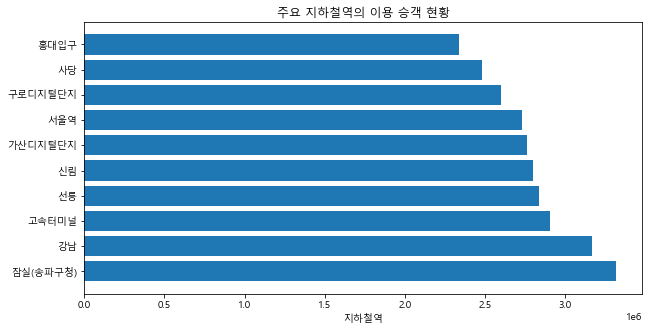

In [39]:
fig = plt.figure(figsize = (10,5))
plt.barh(list(df_2020_12_sub.index),
        list(df_2020_12_sub['이용승객수']))
plt.title('주요 지하철역의 이용 승객 현황')
plt.xlabel('이용승객수')
plt.xlabel('지하철역')

   + 버스정류장은 미아사거리역, 구로디지털단지역, 홍대입구역 순 등으로 많았고, 지하철역은 잠실, 강남, 고속터미널역 순으로 이용승객이 많음을 보여주었다.

### 2. 대중교통 주요 버스 노선/지하철 호선별 이용 현황
   + 대중교통 주요 버스 노선/지하철 호선별 이용 현황을 파악하기 위해, 주어진 데이터셋 중 가장 최근의 데이터셋인 2020년 12월의 버스 노선/지하철 호선별 이용 현황을 파악한다.
   + 파일 로드 및 전처리 방법은 1. 절의 내용과 유사하다.

In [57]:
df_2020_12_bus = pd.read_excel('Final_exam_Dataset/2020년 12월  교통카드 통계자료.xls',
                              sheet_name = '버스정류장별 이용현황')
df_2020_12_bus

,사용월,노선ID,노선번호,노선명,버스정류장ID,버스정류장명,승차승객수,하차승객수,작업일시
0,2020-12,11110897,0017,0017번(청암동~이촌동),1,청암자이아파트,354,7,2021-01-03 09:36:40
1,2020-12,11110897,0017,0017번(청암동~이촌동),2,청암동강변삼성아파트,"1,219",23,2021-01-03 09:36:40
2,2020-12,11110897,0017,0017번(청암동~이촌동),3,청심경로당,"2,201",17,2021-01-03 09:36:40
3,2020-12,11110897,0017,0017번(청암동~이촌동),4,원효2동주민센터,"3,631",79,2021-01-03 09:36:40
4,2020-12,11110897,0017,0017번(청암동~이촌동),5,산천동,"4,552",186,2021-01-03 09:36:40
...,...,...,...,...,...,...,...,...,...
38999,2020-12,11110729,중랑02,중랑02(진로아파트~한신아파트),22,서일대정문,8,57,2021-01-03 09:36:40
39000,2020-12,11110729,중랑02,중랑02(진로아파트~한신아파트),23,새마을금고,69,888,2021-01-03 09:36:40
39001,2020-12,11110729,중랑02,중랑02(진로아파트~한신아파트),24,공판장,1,845,2021-01-03 09:36:40
39002,2020-12,11110729,중랑02,중랑02(진로아파트~한신아파트),25,진주빌라.바다약국,3,"1,160",2021-01-03 09:36:40


In [42]:
df_2020_12_sub = pd.read_excel('Final_exam_Dataset/2020년 12월  교통카드 통계자료.xls',
                              sheet_name = '지하철 노선별 역별 이용현황')
df_2020_12_sub

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2020-12,1호선,1,서울역,"842,346","797,546",2021-01-03 09:36:40
1,2020-12,1호선,10,동묘앞,"208,719","214,534",2021-01-03 09:36:40
2,2020-12,1호선,2,시청,"429,145","423,621",2021-01-03 09:36:40
3,2020-12,1호선,3,종각,"667,792","642,037",2021-01-03 09:36:40
4,2020-12,1호선,4,종로3가,"493,106","450,421",2021-01-03 09:36:40
...,...,...,...,...,...,...,...
598,2020-12,우이신설선,705,북한산보국문,"126,781","124,337",2021-01-03 09:36:40
599,2020-12,우이신설선,706,정릉,"96,501","92,058",2021-01-03 09:36:40
600,2020-12,우이신설선,707,성신여대입구(돈암),"65,933","71,709",2021-01-03 09:36:40
601,2020-12,우이신설선,708,보문,"33,909","34,610",2021-01-03 09:36:40


   + 전처리 방법은 1.절과 동일하나, 버스의 경우는 버스노선번호, 지하철의 경우는 호선명 별로 그룹화하여 피봇테이블로 나타낸다.

In [58]:
for i in range(len(df_2020_12_bus)):
    df_2020_12_bus['승차승객수'][i] = int(df_2020_12_bus['승차승객수'][i].replace(',',''))+int(df_2020_12_bus['하차승객수'][i].replace(',',''))
df_2020_12_bus.rename(columns = {'승차승객수':'이용승객수'}, inplace = True)
df_2020_12_bus = df_2020_12_bus[['노선명','이용승객수']]
df_2020_12_bus = df_2020_12_bus.groupby(['노선명']).sum()
df_2020_12_bus

,이용승객수
노선명,
0017번(청암동~이촌동),244452
01A번(서울역환승센터~서울역환승센터),27494
01B번(서울역환승센터~서울역환승센터),27486
02번(남산서울타워~동대입구),81777
03번(시청앞~시청앞),3042
...,...
종로11(삼청공원~서울역),91312
종로12(서울대학교병원~종로3가),112827
종로13(평창파출소~부암동주민센터.무계원),32455


In [46]:
for i in range(len(df_2020_12_sub)):
    df_2020_12_sub['승차승객수'][i] = int(df_2020_12_sub['승차승객수'][i].replace(',',''))+int(df_2020_12_sub['하차승객수'][i].replace(',',''))
df_2020_12_sub.rename(columns = {'승차승객수':'이용승객수'}, inplace = True)
df_2020_12_sub = df_2020_12_sub[['호선명','이용승객수']]
df_2020_12_sub = df_2020_12_sub.groupby(['호선명']).sum()
df_2020_12_sub

,이용승객수
호선명,
1호선,8926440
2호선,54875739
3호선,20712663
4호선,20024184
5호선,25273422
6호선,13276067
7호선,29336684
8호선,8014909
9호선,10800846


   + 마찬가지로 주요 버스 노선/지하철 호선은 이용승객수가 가장 많은 상위 10개의 버스 노선/지하철 호선으로 한다.

In [59]:
df_2020_12_bus = df_2020_12_bus.sort_values(by = '이용승객수', ascending = False)[:10]
df_2020_12_bus

,이용승객수
노선명,
143번(정릉~개포동),1432630
152번(화계사~삼막사사거리),1431924
160번(도봉산~온수동),1392571
130번(우이동~길동),1361218
303번(성남~신설동),1276285
153번(우이동~당곡사거리),1263838
272번(면목동~남가좌동),1253421
146번(상계주공7단지~강남역),1185358
147번(월계동~도곡동),1158188


In [49]:
df_2020_12_sub = df_2020_12_sub.sort_values(by = '이용승객수', ascending = False)[:10]
df_2020_12_sub

,이용승객수
호선명,
2호선,54875739
7호선,29336684
5호선,25273422
3호선,20712663
4호선,20024184
경부선,18024584
분당선,14819553
6호선,13276067
경인선,11958756


[]

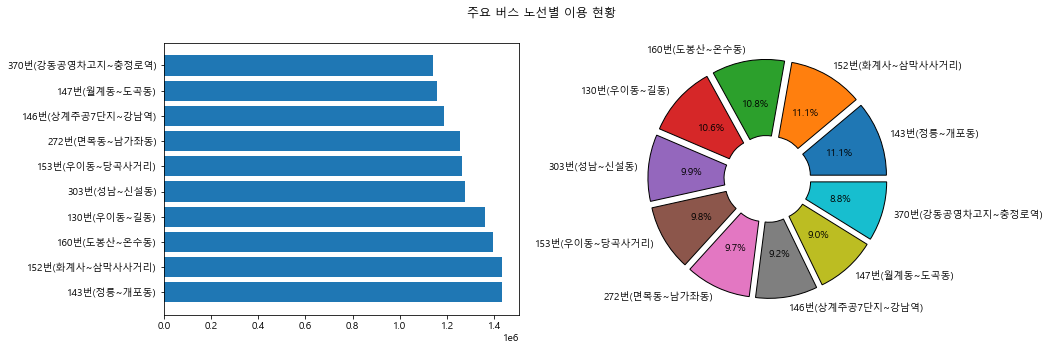

In [61]:
fix,ax = plt.subplots(1,2, figsize = (14,5))
plt.suptitle('주요 버스 노선별 이용 현황')
ax[0].barh(list(df_2020_12_bus.index) , df_2020_12_bus['이용승객수'])
ax[1].pie(df_2020_12_bus['이용승객수'],
         labels = list(df_2020_12_bus.index),
         autopct = '%.1f%%',
         explode = [0.1 for i in range(len(df_2020_12_bus))],
         wedgeprops = {'width': 0.7, 'edgecolor' : 'black', 'linewidth': 1}
         )
plt.plot()
plt.show()

[]

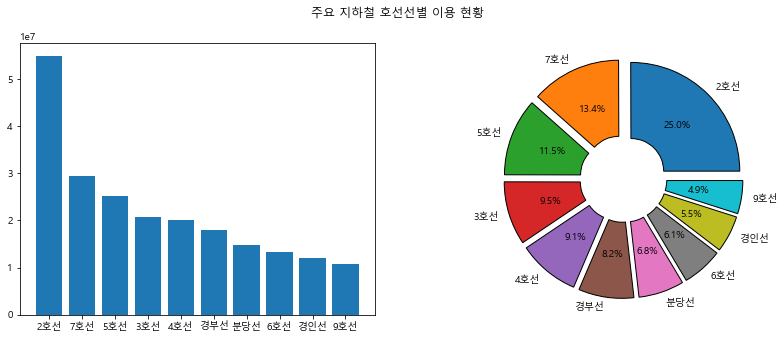

In [56]:
fix,ax = plt.subplots(1,2, figsize = (14,5))
plt.suptitle('주요 지하철 호선선별 이용 현황')
ax[0].bar(list(df_2020_12_sub.index) , df_2020_12_sub['이용승객수'])
ax[1].pie(df_2020_12_sub['이용승객수'],
         labels = list(df_2020_12_sub.index),
         autopct = '%.1f%%',
         explode = [0.1 for i in range(len(df_2020_12_sub))],
         wedgeprops = {'width': 0.7, 'edgecolor' : 'black', 'linewidth': 1}
         )
plt.plot()
plt.show()

   + 버스는 정릉 ~ 개포동 구간을 운행하는 143번을 뒤이어 화계사 ~ 삼막사사거리를 있는 152번 버스가 뒤를 잇는 것을 볼 수 있고, 지하철은 서울 주요 지역(강남, 잠실 등)과 많은 대학교를 운행하는 2호선을 뒤이어 7호선, 5호선 순으로 뒤를 잇는 것을 볼 수 있다.

### 3. 코로나 전/후의 대중교통 이용량 변화
   + 코로나 19(COVID-19)는 대한민국 인천국제공항에 2020년 1월 8일 첫 발생함으로써, 한국에 유행이 시작되었으므로, 분석 기간 중 코로나 전은 2019년 1월 이전인 2019년 1월 ~ 2019년 12월, 코로나 후는 2020년 1월 ~ 2020년 12월로 한다.
   

In [6]:
dataset = [x for x in Path('./Final_exam_Dataset').glob("*.xls")] ## 경로상의 xlsx 파일이름 저장
dataset.sort()
dataset

[WindowsPath('Final_exam_Dataset/2019년 01월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 02월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 03월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 04월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 05월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 06월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 07월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 08월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 09월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 10월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 11월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 12월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2020년 01월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2020년 02월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2020년 03월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2020년 04월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam

   + 코로나 이전의 월별 버스 이용 이용승객수(ls_bus_before)와 코로나 이후 월별 버스 이용 승객수(ls_bus_after)를 각각 리스트로 구성하여 저장한다.
   + 월별 이용 승객수는 해당 월의 승차승객수와 하차 승객수의 합이다. sum()함수를 쓰려고 했으나, 해당 컬럼의 자료형은 char이므로, 형변환을 통해 더해야 한다.
   + dataset 객체에 파일명 기준으로 sort하였으므로, 읽히는 순서대로 2019년 1월 ~ 2020년 12월이다.

In [13]:
ls_bus_before = []
ls_bus_after = []
for i in range(len(dataset)):
    user_sum = 0
    df = pd.read_excel(dataset[i],
                              sheet_name = '버스정류장별 이용현황')
    for j in range(len(df)):
            user_sum += int(df['승차승객수'][j].replace(',',''))+int(df['하차승객수'][j].replace(',',''))
    if i<len(dataset)/2:
        ls_bus_before.append(user_sum)
    else:
        ls_bus_after.append(user_sum)

   + 코로나 이전의 버스 이용승객수와 이후의 버스 이용승객수를 그래프로 시각화 한다.
   + 연속적인 시간이므로 위, 아래가 아닌 옆으로 길게 늘여 시각화한다.
   + 옆으로 늘여 표현하기 위해 x축의 인덱스를 아래의 셀과 같이 리스트로 구성한다.

In [28]:
xindex_24 = []
for i in range(24):
    if i < 12:
        xindex_24.append('19년 {}월'.format(i+1))
    else:
        xindex_24.append('20년 {}월'.format(i-11))

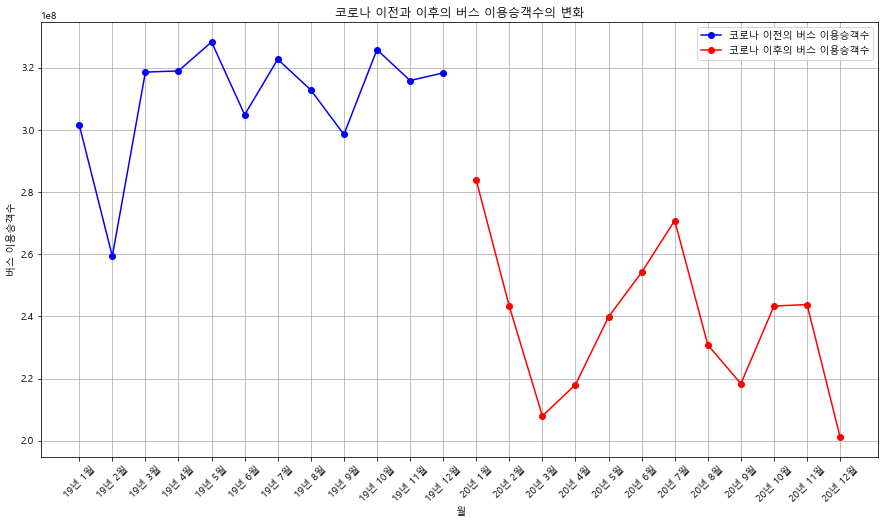

In [175]:
plt.figure(figsize = (15,8))
plt.title('코로나 이전과 이후의 버스 이용승객수의 변화')
plt.plot(list(range(1,13)), ls_bus_before, 'bo-',label = '코로나 이전의 버스 이용승객수')
plt.plot(list(range(13,25)), ls_bus_after, 'ro-',label = '코로나 이후의 버스 이용승객수')
plt.xticks(list(range(1,25)),labels = xindex_24, rotation = 45)
plt.xlabel('월')
plt.ylabel('버스 이용승객수')
plt.grid(True)
plt.legend()
plt.show()

   + 같은 월별마다의 코로나 이전과 이후의 이용승객수를 막대그래프로 시각화한다.

In [81]:
xindex_12 = []
for i in range(12):
    xindex_12.append('{}월'.format(i+1))

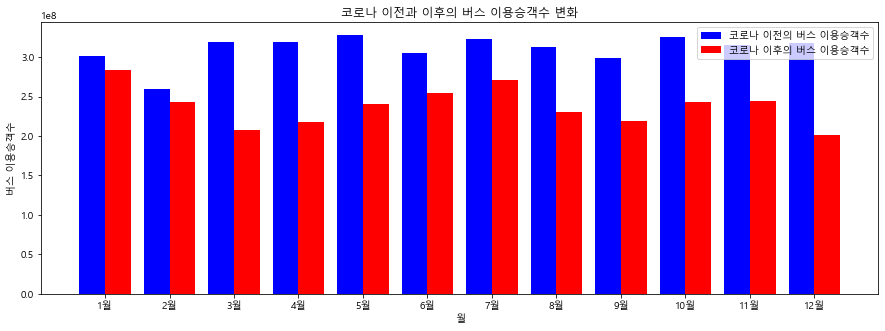

In [174]:
x = np.arange(len(xindex_12))
w = 0.4

plt.figure(figsize = (15,5))
plt.title('코로나 이전과 이후의 버스 이용승객수 변화')
plt.xlabel('월')
plt.ylabel('버스 이용승객수')
plt.bar(x,ls_bus_before, color = 'blue', width = w, label = '코로나 이전의 버스 이용승객수')
plt.bar(x+w,ls_bus_after, color = 'red', width = w, label = '코로나 이후의 버스 이용승객수')
plt.legend(loc='best')

plt.xticks(x+w/2,xindex_12)
plt.plot()
plt.show()

   + 지하철 총 이용승객수에 대하여도 동일한 과정을 통해 시각화 한다.

In [19]:
ls_sub_before = []
ls_sub_after = []
for i in range(len(dataset)):
    user_sum = 0
    df = pd.read_excel(dataset[i],
                              sheet_name = '지하철 노선별 역별 이용현황')
    for j in range(len(df)):
            user_sum += int(df['승차승객수'][j].replace(',',''))+int(df['하차승객수'][j].replace(',',''))
    if i<len(dataset)/2:
        ls_sub_before.append(user_sum)
    else:
        ls_sub_after.append(user_sum)

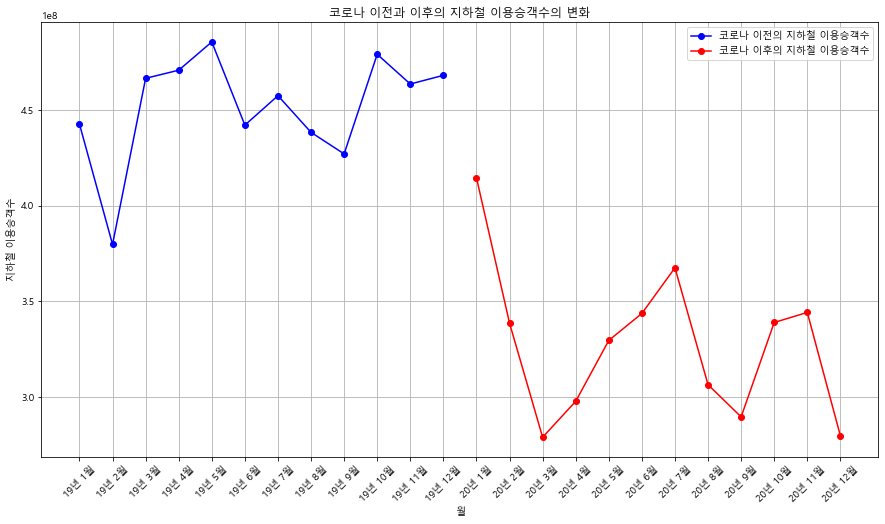

In [173]:
plt.figure(figsize = (15,8))
plt.title('코로나 이전과 이후의 지하철 이용승객수의 변화')
plt.plot(list(range(1,13)), ls_sub_before, 'bo-',label = '코로나 이전의 지하철 이용승객수')
plt.plot(list(range(13,25)), ls_sub_after, 'ro-',label = '코로나 이후의 지하철 이용승객수')
plt.xticks(list(range(1,25)),labels = xindex_24, rotation = 45)
plt.xlabel('월')
plt.ylabel('지하철 이용승객수')
plt.grid(True)
plt.legend()
plt.show()

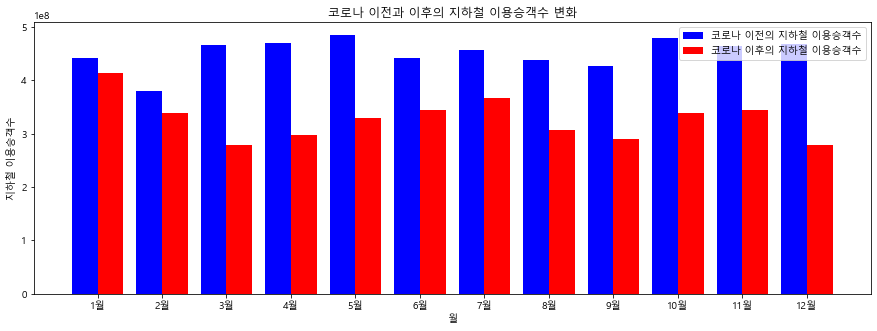

In [170]:
x = np.arange(len(xindex_12))
w = 0.4

plt.figure(figsize = (15,5))
plt.title('코로나 이전과 이후의 지하철 이용승객수 변화')
plt.xlabel('월')
plt.ylabel('지하철 이용승객수')
plt.bar(x,ls_sub_before, color = 'blue', width = w, label = '코로나 이전의 지하철 이용승객수')
plt.bar(x+w,ls_sub_after, color = 'red', width = w, label = '코로나 이후의 지하철 이용승객수')
plt.legend(loc='best')

plt.xticks(x+w/2,xindex_12)
plt.show()

[]

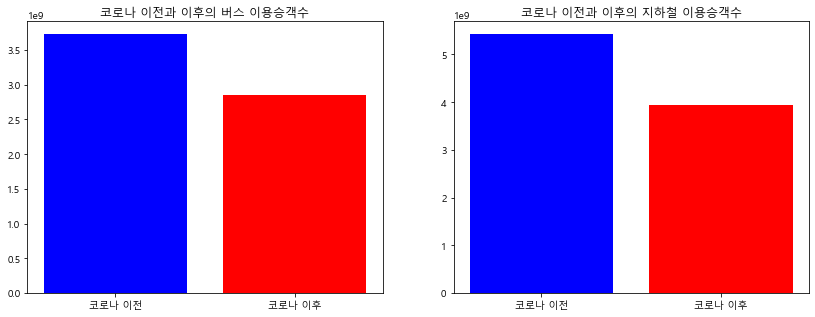

In [416]:
bar_xaxis = ['코로나 이전', '코로나 이후']
bar_color = ['blue','red']

fix,ax = plt.subplots(1,2, figsize = (14,5))
ax[0].bar(bar_xaxis, 
          [sum(ls_bus_before),sum(ls_bus_after)],
          color = bar_color)
ax[0].set_title('코로나 이전과 이후의 버스 이용승객수')
ax[1].bar(bar_xaxis, 
          [sum(ls_sub_before),sum(ls_sub_after)],
          color = bar_color)
ax[1].set_title('코로나 이전과 이후의 지하철 이용승객수')
plt.plot()

   + 버스와 지하철 모두 월별로 유사한 형태의 그래프를 보여준다.
   + 전체적으로 보았을때 버스와 지하철 모두 코로나 이전의 버스/지하철 이용 승객수보다 코로나 이후의 버스/지하철 이용 승객수가 적으며, 특히 2020년 1월~2020년 3월에 눈에띄게 감소했음을 확인할 수 있다.
   + 코로나 이후의 버스/지하철 이용승객수는 이전 해의 같은 월에 대하여 12개월 모두 이용량이 적음을 알 수 있으며, 특히 3 ~ 12 월에 그 차이가 큼을 확인할 수 있다.
   + 버스와 지하철 모두 월별로 유사한 형태의 그래프를 보여주었는데, 코로나 이전의 경우는 방학/휴가기간에 이용승객수가 감소한 후 이외의 기간에는 늘어나는 그래프를 볼 수 있지만, 코로나 이후는 이와 조금 다른 형태의 그래프를 보여주었다.
   + 버스와 지하철 모두 코로나 이전에 비해 코로나 이후의 이용 승객수가 눈에 띄게 감소하였음을 알 수 있다.

### 4. 월별 코로나 확진자 수와 대중교통 이용량의 상관관계 분석
   + 코로나 이후의 그래프 형태의 원인을 분석하기 위해 월별 코로나 확진자수와 코로나 이후의 버스/지하철 이용승객수 동향을 시각화한다.
   + 월별 코로나 현황을 파악하기 위해 보건복지부에서 제공하는 일별 코로나 현황 데이터셋을 이용한다.

In [58]:
sub_df = pd.read_csv('./Final_exam_Dataset/[보건복지부]일별 코로나 현황.csv')
sub_df = sub_df[['stateDt','decideCnt']]
sub_df = sub_df.dropna()
sub_df ##[일, 누적 확진자수]

,stateDt,decideCnt
1,20200202,2.0
2,20200203,15.0
4,20200205,18.0
5,20200205,19.0
6,20200206,23.0
...,...,...
526,20210608,145091.0
527,20210609,145692.0
528,20210610,146303.0
529,20210611,146859.0


   + 데이터 셋에는 1월의 데이터가 존재하지 않는다. 1월의 누적 확진자는 1월 31 기준 11명이다.
   + 이후, 월별 확진자는 매월 마지막날 기준으로 이전 월의 마지막날을 감산하여 해당 월의 확진자 수를 구한다.
   + 이를 코로나 이후의 버스/지하철 이용승객수 그래프와 겹처 그려서 월별 코로나 확진자 수와 이용 승객수의 동향을 파악한다.

In [59]:
ls_decide = [11]
for i in range(1,len(sub_df)):
    if sub_df.iloc[i][0] >= sub_df.iloc[i-1][0] + 10:
        ls_decide.append(int(sub_df.iloc[i][1])-ls_decide[-1])
    if sub_df.iloc[i][0] == 20210101.0:
        break
# ls_decide

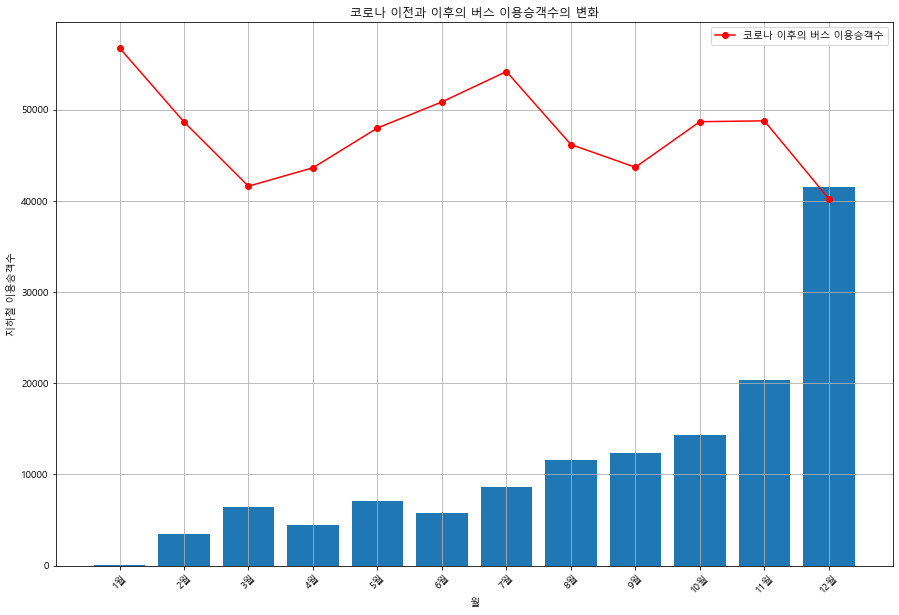

In [161]:
plt.figure(figsize = (15,10))
plt.title('코로나 이전과 이후의 버스 이용승객수의 변화')
plt.bar(list(range(1,13)), ls_decide)
plt.plot(list(range(1,13)), [x/5000 for x in ls_bus_after], 'ro-',label = '코로나 이후의 버스 이용승객수')
plt.xticks(list(range(1,13)),labels = xindex_12, rotation = 45)
plt.xlabel('월')
plt.ylabel('지하철 이용승객수')
plt.grid(True)
plt.legend()

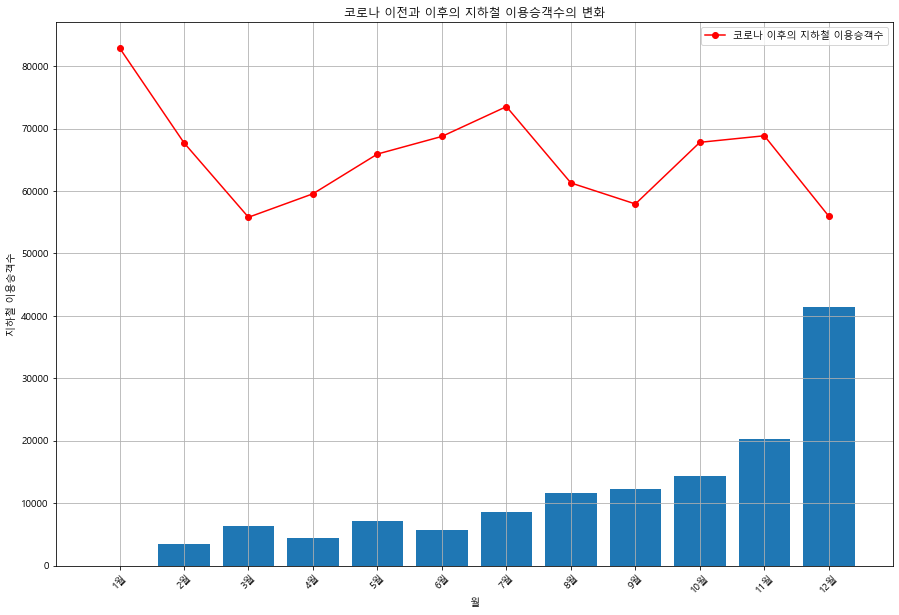

In [159]:
plt.figure(figsize = (15,10))
plt.title('코로나 이전과 이후의 지하철 이용승객수의 변화')
plt.bar(list(range(1,13)), ls_decide)
plt.plot(list(range(1,13)), [x/5000 for x in ls_sub_after], 'ro-',label = '코로나 이후의 지하철 이용승객수')
plt.xticks(list(range(1,13)),labels = xindex_12, rotation = 45)
plt.xlabel('월')
plt.ylabel('지하철 이용승객수')
plt.grid(True)
plt.legend()

   + 한 눈에 시각화 하기 위해 코로나 이후의 월별 버스, 지하철 이용승객수가 있는 리스트의 모든 값을 일정하게 나누어 주었다.
   + 코로나 확진자가 계속해서 늘어나는 1~3월과 가장 많은 확진자 수가 나타난 12월에 버스와 지하철 모두 이용승객수가 급감함을 확인할 수 있다.
   + 월별 버스와 지하철 이용승객수와 확진자 수의 상관 관계를 분석하기 위해 시각화한다.

In [179]:
corr_df = pd.DataFrame({'월별 코로나 확진자 수': ls_decide, 
                        '코로나 이후 버스 이용승객수': ls_bus_after,
                       '코로나 이후 지하철 이용승객수':ls_sub_after})
corr_df

,월별 코로나 확진자 수,코로나 이후 버스 이용승객수,코로나 이후 지하철 이용승객수
0,11,283850413,414682647
1,3515,243255973,338641156
2,6372,208005210,278995559
3,4402,218092607,297802722
4,7101,239902487,329632420
5,5749,254212036,343750579
6,8587,270865012,367610345
7,11595,230862681,306490047
8,12294,218387028,289643781
9,14341,243369011,339013537


<AxesSubplot:xlabel='코로나 이후 지하철 이용승객수', ylabel='월별 코로나 확진자 수'>

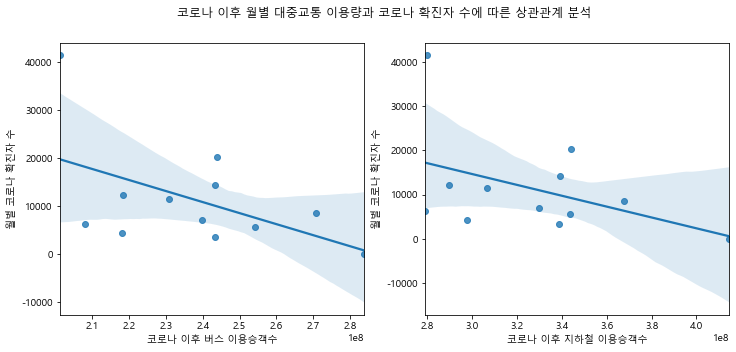

In [192]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
plt.suptitle('코로나 이후 월별 대중교통 이용량과 코로나 확진자 수에 따른 상관관계 분석')
sns.regplot(x='코로나 이후 버스 이용승객수',y='월별 코로나 확진자 수',data=corr_df, ax = ax1)
sns.regplot(x='코로나 이후 지하철 이용승객수',y='월별 코로나 확진자 수',data=corr_df, ax = ax2)

   + 코로나 이후 버스 이용객수와 지하철 이용승객수 모두 월별 코로나 확진자 수에 대하여 음의 상관관계를 가지고 있음을 알 수 있다. 즉, 코로나 확진자수가 늘어날 수록, 대중교통 이용 승객수는 감소한다.

### 5. 코로나 이후 이용승객수가 증가한 주요 정류장/역
   + 코로나 이후 이용량이 증가한 정류장/역을 분석하기 위해 정류장/역 단위로 연합계를 계산하여 코로나 이전과 이후를 비교하여 시각화한다.
   + 주요 정류장/역은 이용승객수의 비율이 가장 높게 증가한 상위 10개 정류장/역에 대하여 시각화 한다.
   + 5.절에서는 이용량이 증가한 주요 정류장/역에 대해서만 시각화한다.

In [2]:
dataset = [x for x in Path('./Final_exam_Dataset').glob("*.xls")] ## 경로상의 xlsx 파일이름 저장
dataset.sort()
dataset

[WindowsPath('Final_exam_Dataset/2019년 01월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 02월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 03월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 04월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 05월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 06월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 07월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 08월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 09월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 10월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 11월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2019년 12월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2020년 01월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2020년 02월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2020년 03월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam_Dataset/2020년 04월  교통카드 통계자료.xls'),
 WindowsPath('Final_exam

   + 코로나 이전과 이후의 버스정류장별로 이용승객수를 도출한다.

In [286]:
df_bus_before = pd.DataFrame()
df_bus_after = pd.DataFrame()
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                       sheet_name = '버스정류장별 이용현황')
    for j in range(len(df)):
        df['승차승객수'][j] = int(df['승차승객수'][j].replace(',','')) + int(df['하차승객수'][j].replace(',',''))
    df = df[['버스정류장명','승차승객수']]
    df.rename(columns = {'승차승객수': '이용승객수'}, inplace = True)
    if i<len(dataset)/2:
        df_bus_before = pd.concat([df_bus_before,df])
    else:
        df_bus_after = pd.concat([df_bus_after,df])

   + 코로나 이전과 이후의 각 데이터프레임을 노선명 기준으로 그룹화하여 피봇테이블로 나타낸다.

In [291]:
df_bus_before = df_bus_before.groupby(df_bus_before['버스정류장명']).sum()
df_bus_after = df_bus_after.groupby(df_bus_after['버스정류장명']).sum()

   + 데이터프레임을 살펴보면 버스정류장의 차이가 있음을 알 수 있다. 이는 새로 만들어졌거나 사라진 버스정류장임을 유추 할 수 있다.
   + 해당 데이터 분석 과정에서는 2019년 2020년 모두 존재하는 버스정류장만을 분석하여 시각화한다.
   + 두 데이터프레임을 병합하고 결측치를 제거하면 2019년과 2020년에 모두 존재하는 버스정류장 만을 얻을 수있다.

In [292]:
df_bus_before.rename(columns={'이용승객수': '코로나 이전 이용승객수'}, inplace = True)
df_bus_after.rename(columns={'이용승객수': '코로나 이후 이용승객수'}, inplace = True)

In [350]:
df_bus = pd.merge(df_bus_before,
                   df_bus_after,
                  left_index = True,
                  right_index = True,
                  how = 'outer')
df_bus = df_bus.dropna()
df_bus

,코로나 이전 이용승객수,코로나 이후 이용승객수
버스정류장명,,
(구)단대동주민센터,160512.0,35967.0
11단지,83901.0,76617.0
123전자타운.2001아울렛,541368.0,377161.0
12번지건영아파트,274635.0,211084.0
13단지아파트입구,164801.0,146183.0
...,...,...
힐스테이트서울숲리버,105356.0,77032.0
힐스테이트송파.송파한라비발디,132705.0,76427.0
힐스테이트입구,44439.0,35201.0


   + 증가율에 대한 컬럼을 만들고 정렬하여 이용승객수가 증가한 상위 10개의 버스정류장을 분석하기 위해 시각화 한다.
   + 증가율 식은 아래의 수식을 따른다.
   $$증가율 = {{{코로나 이후 이용승객수-코로나 이전 이용승객수} \over 코로나 이전 이용승객수} * 100}$$
   
   
   + 버스정류장이 신설 됐을 경우, 증가율이 지나치게 높게 나올 수 있다.
   + 일정 비율 이상의 증가율을 보이는 경우, 신뢰성이 떨어 질 수 있으므로, 적당한 비율 안에서의 증가율에 따른 테이블을 마스킹한다.

In [351]:
rate_inc = []
for i in range(len(df_bus)):
    rate_inc.append((df_bus.iloc[i][1]-df_bus.iloc[i][0])/df_bus.iloc[i][0]*100)

In [352]:
df_bus.loc[:,'증가율'] = rate_inc
# df_bus = df_bus['증가율']
df_bus = df_bus.sort_values(by='증가율',ascending = False)
df_bus = df_bus[df_bus['증가율'] <= 50][:10]
df_bus

,코로나 이전 이용승객수,코로나 이후 이용승객수,증가율
버스정류장명,,,
중앙보훈병원1번출구,111840.0,166914.0,49.243562
망월사역3번출구,35873.0,53363.0,48.755331
월곡1동밤골경로당,789.0,1167.0,47.908745
자이아파트정문앞,175317.0,258734.0,47.580668
센트럴아이파크.강남구도시관리공단,255218.0,376282.0,47.435526
고등동주민센터,9313.0,13710.0,47.213572
정곡초교,11525.0,16955.0,47.114967
원종IC(경유),1577.0,2305.0,46.163602
가산동기점,26150.0,38148.0,45.881453


In [358]:
df_bus_concat = pd.DataFrame()
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                       sheet_name = '버스정류장별 이용현황')
    for j in range(len(df)):
        df['승차승객수'][j] = int(df['승차승객수'][j].replace(',','')) + int(df['하차승객수'][j].replace(',',''))
    df = df[['버스정류장명','승차승객수']]
    df.rename(columns = {'승차승객수': '이용승객수'}, inplace = True)
    df = df.groupby(df['버스정류장명']).sum()
    df_bus_concat = pd.concat([df_bus_concat,df])
df_bus_concat

,이용승객수
버스정류장명,
(구)단대동주민센터,13475
(구)태풍약국,47745
11단지,7172
123전자타운.2001아울렛,43928
12번지건영아파트,23793
...,...
힐스테이트송파.송파더센트레,5800
힐스테이트신촌.신촌푸르지오1단지후문,12854
힐스테이트입구,2471


   + 정류장의 월별 이용량을 담은 리스트가 24 미만인 경우, 버스정류장의 신설, 폐지 등의 이유를 유추할 수 있다.
   + 본 절에서는 이용승객수가 증가한 정류장을 다루고 있으므로 신설 버스정류장을 다루고 있을 것이다. 따라서, 24에서 적은 갯수 만큼 앞에 0을 추가해 준다.

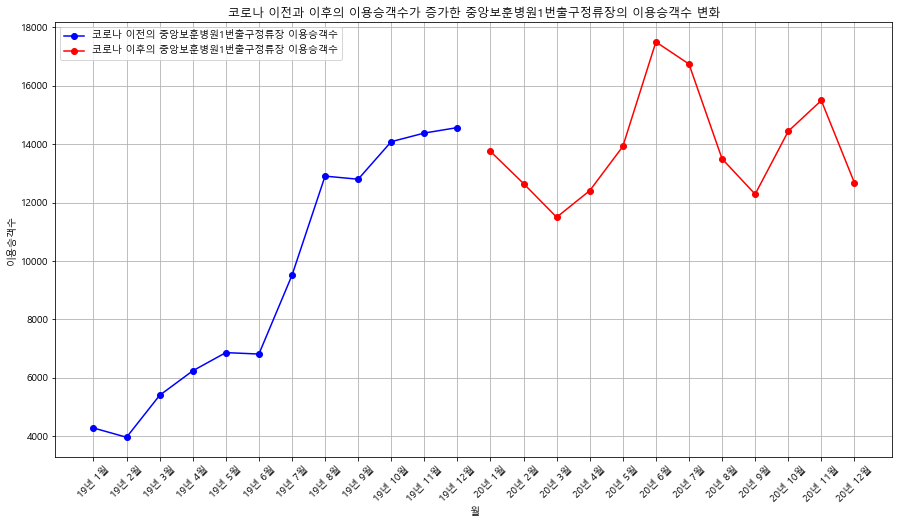

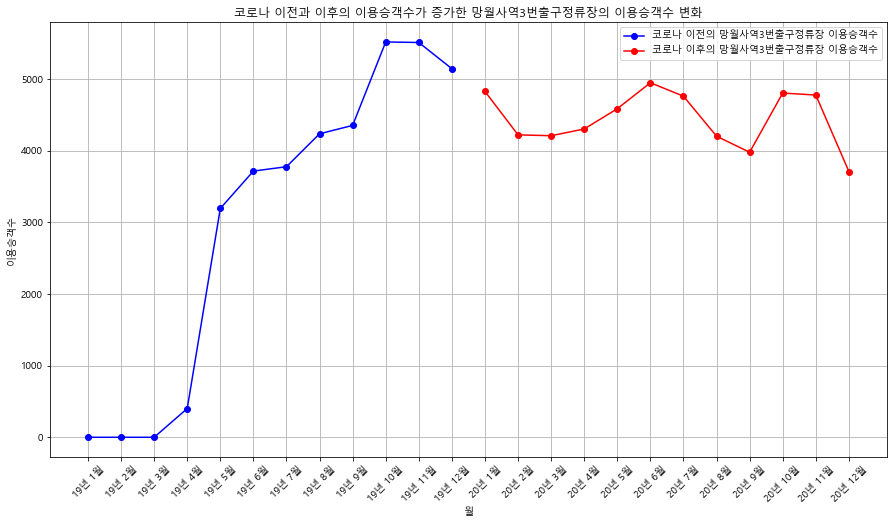

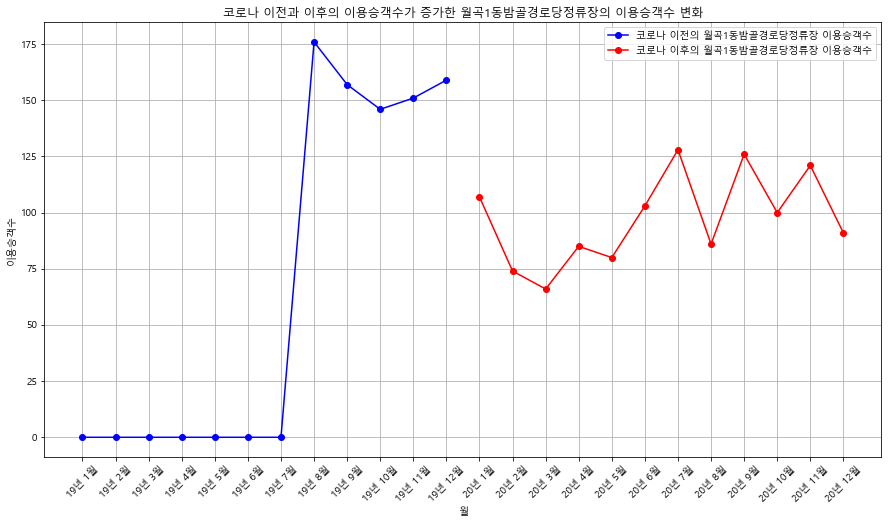

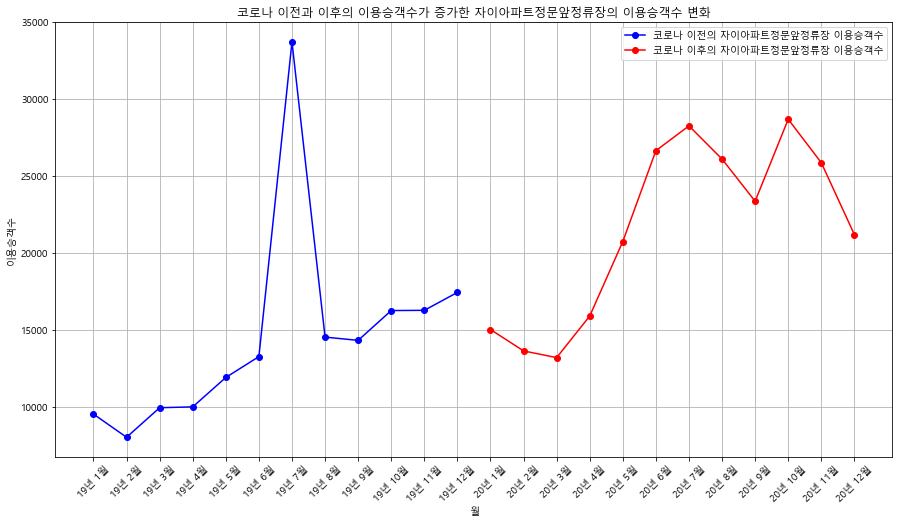

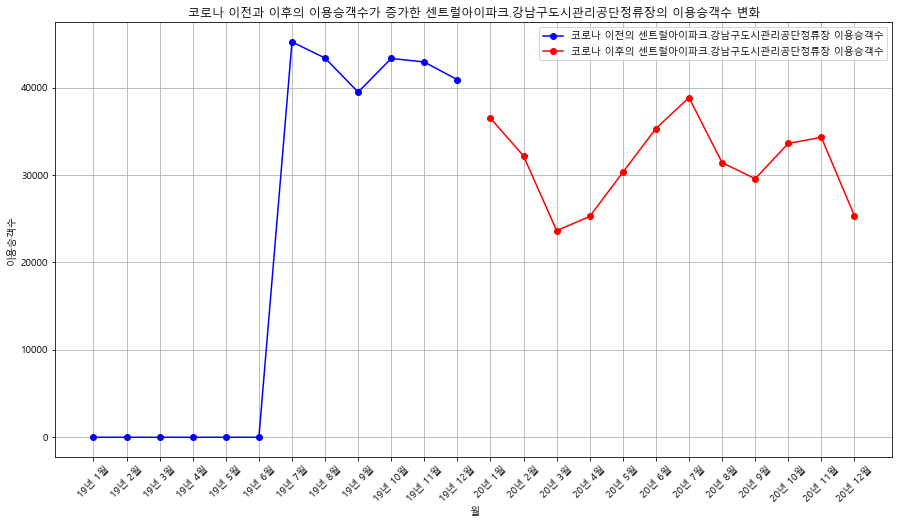

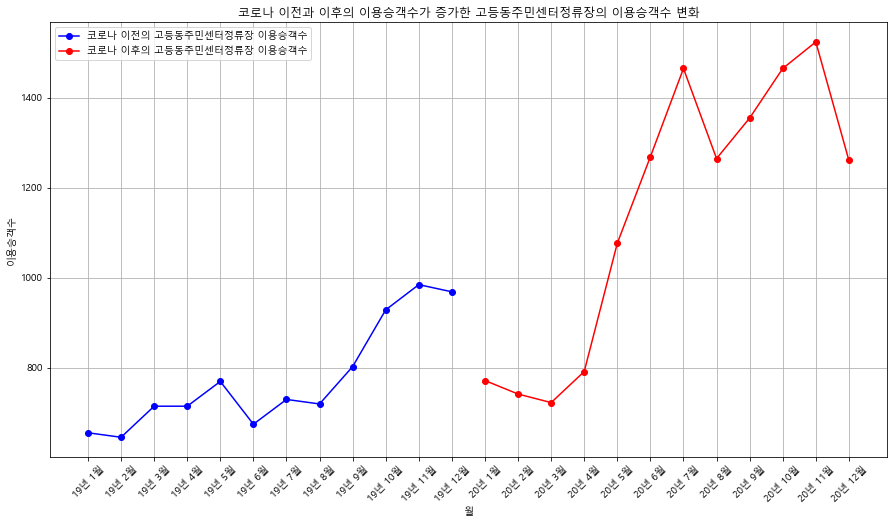

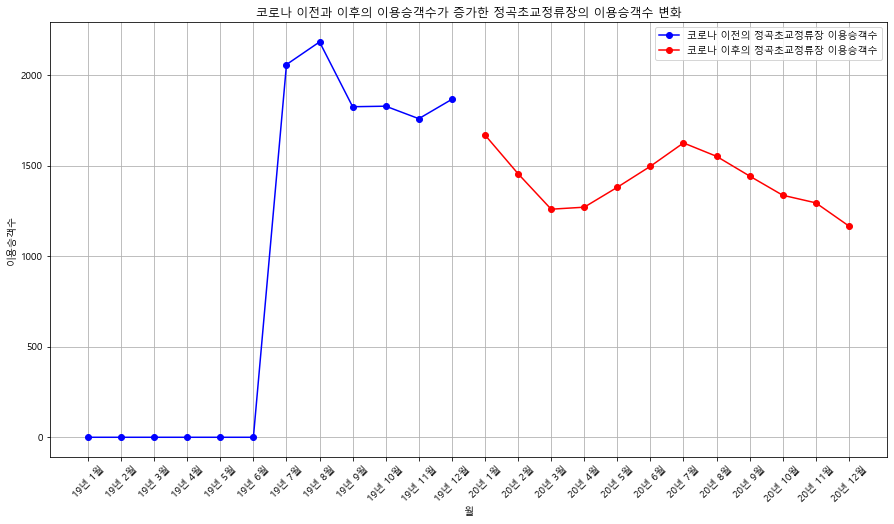

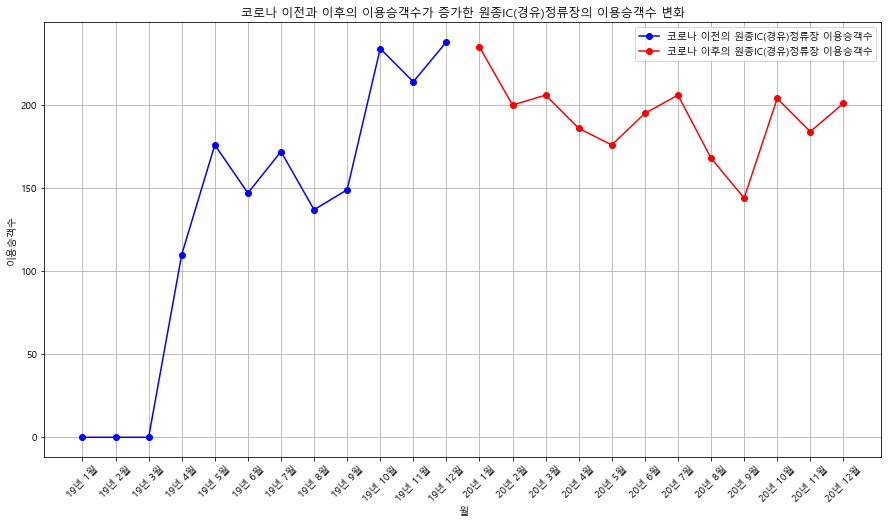

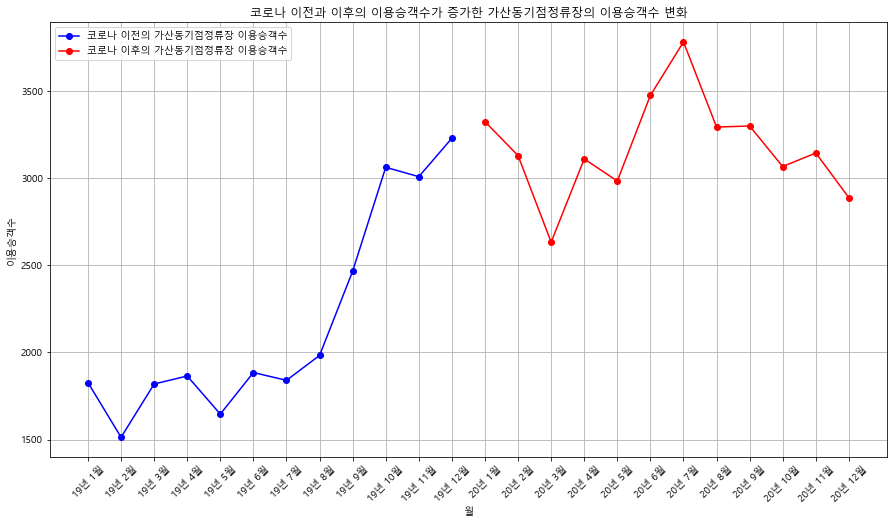

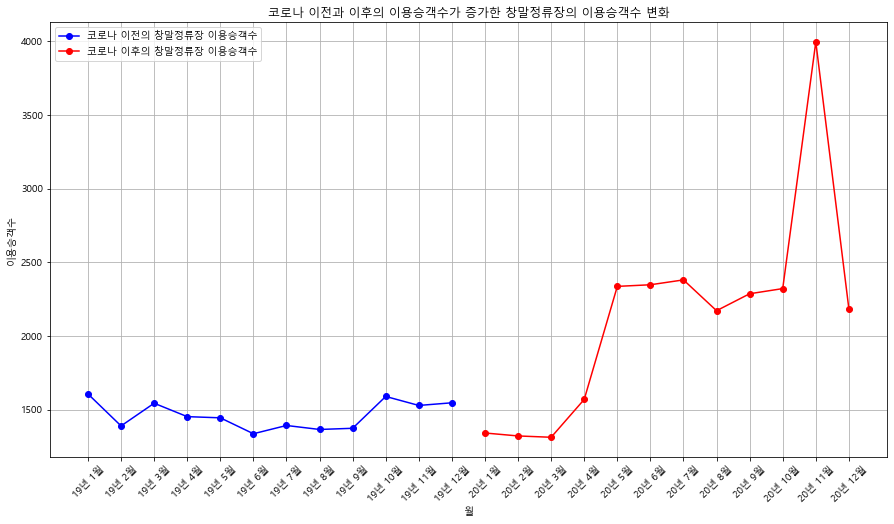

In [444]:
for i in range(len(list(df_bus.index))):
    user_ls = list(df_bus_concat[df_bus_concat.index == list(df_bus.index)[i]]['이용승객수'])
    if len(user_ls) <= 24:
        for j in range(24-len(user_ls)):
            user_ls.insert(0,0)
            
    plt.figure(figsize = (15,8))
    plt.title('코로나 이전과 이후의 이용승객수가 증가한 {}정류장의 이용승객수 변화'.format(list(df_bus.index)[i]))
    plt.plot(list(range(1,13)), user_ls[:12],
             'bo-',label = '코로나 이전의 {}정류장 이용승객수'.format(list(df_bus.index)[i]))
    plt.plot(list(range(13,25)), user_ls[12:],
             'ro-',label = '코로나 이후의 {}정류장 이용승객수'.format(list(df_bus.index)[i]))
    plt.xticks(list(range(1,25)),labels = xindex_24, rotation = 45)
    plt.xlabel('월')
    plt.ylabel('이용승객수')
    plt.grid(True)
    plt.legend()
    plt.show()

   + 지하철에 대해서도 같은 과정을 수행해 준다.

In [392]:
df_sub_before = pd.DataFrame()
df_sub_after = pd.DataFrame()
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                       sheet_name = '지하철 노선별 역별 이용현황')
    for j in range(len(df)):
        df['승차승객수'][j] = int(df['승차승객수'][j].replace(',','')) + int(df['하차승객수'][j].replace(',',''))
    df = df[['지하철역','승차승객수']]
    df.rename(columns = {'승차승객수': '이용승객수'}, inplace = True)
    if i<len(dataset)/2:
        df_sub_before = pd.concat([df_sub_before,df])
    else:
        df_sub_after = pd.concat([df_sub_after,df])

In [393]:
df_sub_before = df_sub_before.groupby(df_sub_before['지하철역']).sum()
df_sub_after = df_sub_after.groupby(df_sub_after['지하철역']).sum()

In [394]:
df_sub_before.rename(columns={'이용승객수': '코로나 이전 이용승객수'}, inplace = True)
df_sub_after.rename(columns={'이용승객수': '코로나 이후 이용승객수'}, inplace = True)

In [409]:
df_sub = pd.merge(df_sub_before,
                   df_sub_after,
                  left_index = True,
                  right_index = True,
                  how = 'outer')
df_sub = df_sub.dropna()
df_sub

,코로나 이전 이용승객수,코로나 이후 이용승객수
지하철역,,
4.19민주묘지,2311025.0,1633446
가능,5129442.0,3864010
가락시장,13359150.0,10356732
가산디지털단지,41604306.0,35629468
가양,14998388.0,11772614
...,...,...
회기,21309849.0,14070540
회룡,9622387.0,7348478
회현(남대문시장),22915748.0,14056723


In [410]:
rate_inc = []
for i in range(len(df_sub)):
    rate_inc.append((df_sub.iloc[i][1]-df_sub.iloc[i][0])/df_sub.iloc[i][0]*100)

   + 버스와 달리 지하철은 비이상적인 증가율이 존재하지 않으므로, 증가율에 따른 필터링은 하지 않았다.
   + 하지만, 코로나 이전 이용 승객수보다 코로나 이후 이용승객수가 많은 역이 전체에서 4개밖에 되지 않으므로, 증가율이 양시운 역에 대해서만 필터링하여 마스킹을 수행한다.

In [411]:
df_sub.loc[:,'증가율'] = rate_inc
df_sub = df_sub.sort_values(by='증가율',ascending = False)
df_sub = df_sub[df_sub['증가율'] >= 0]
df_sub

,코로나 이전 이용승객수,코로나 이후 이용승객수,증가율
지하철역,,,
지축,993870.0,1825380,83.663859
신내,619277.0,847021,36.775789
상일동,8871659.0,9186964,3.554070
마곡,4624401.0,4659872,0.767040


In [413]:
df_sub_concat = pd.DataFrame()
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                       sheet_name = '지하철 노선별 역별 이용현황')
    for j in range(len(df)):
        df['승차승객수'][j] = int(df['승차승객수'][j].replace(',','')) + int(df['하차승객수'][j].replace(',',''))
    df = df[['지하철역','승차승객수']]
    df.rename(columns = {'승차승객수': '이용승객수'}, inplace = True)
    df = df.groupby(df['지하철역']).sum()
    df_sub_concat = pd.concat([df_sub_concat,df])
df_sub_concat

,이용승객수
지하철역,
4.19민주묘지,153416
가능,408269
가락시장,1162954
가산디지털단지,3640019
가양,1240173
...,...
회기,1001485
회룡,539812
회현(남대문시장),991103


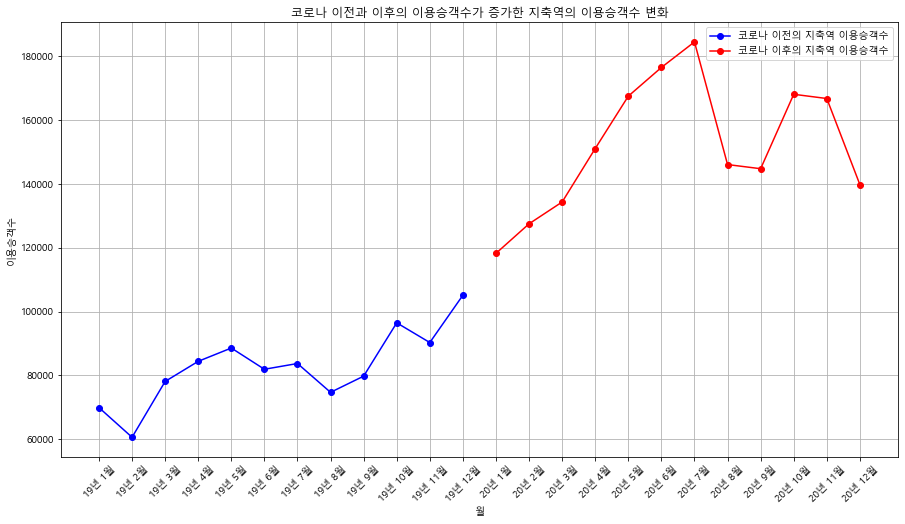

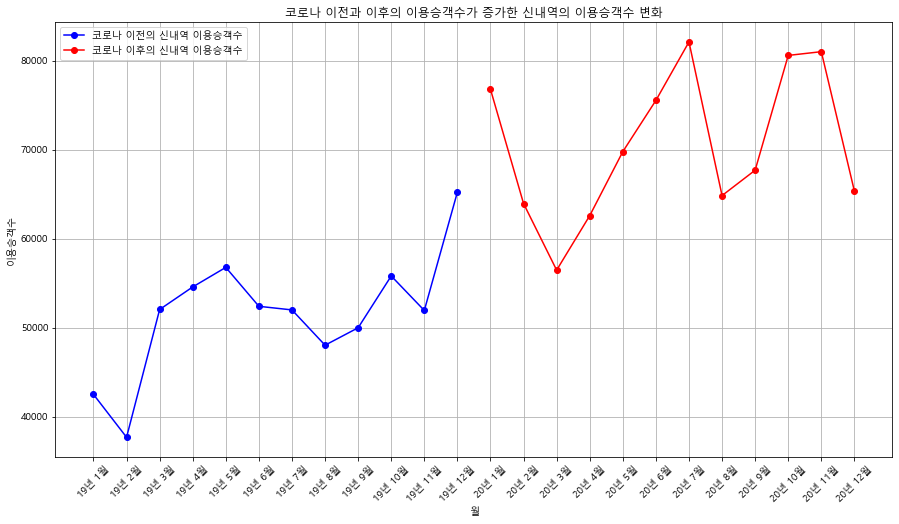

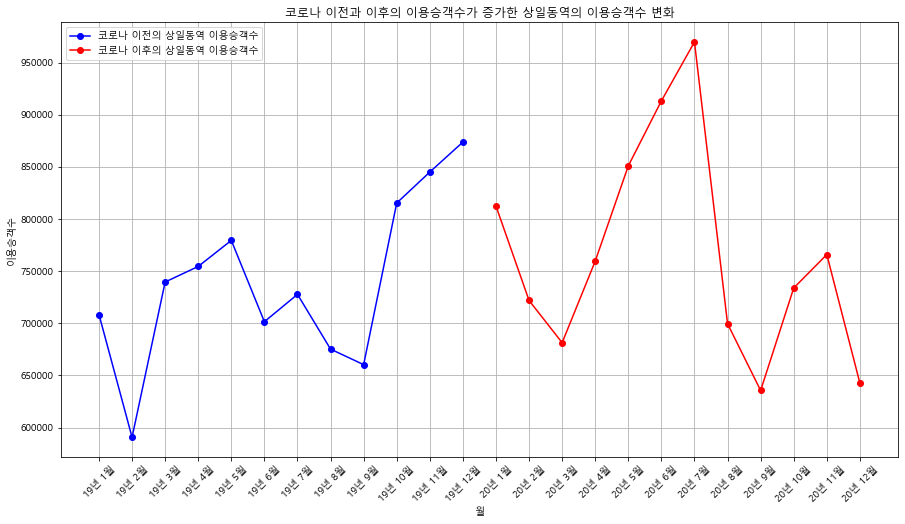

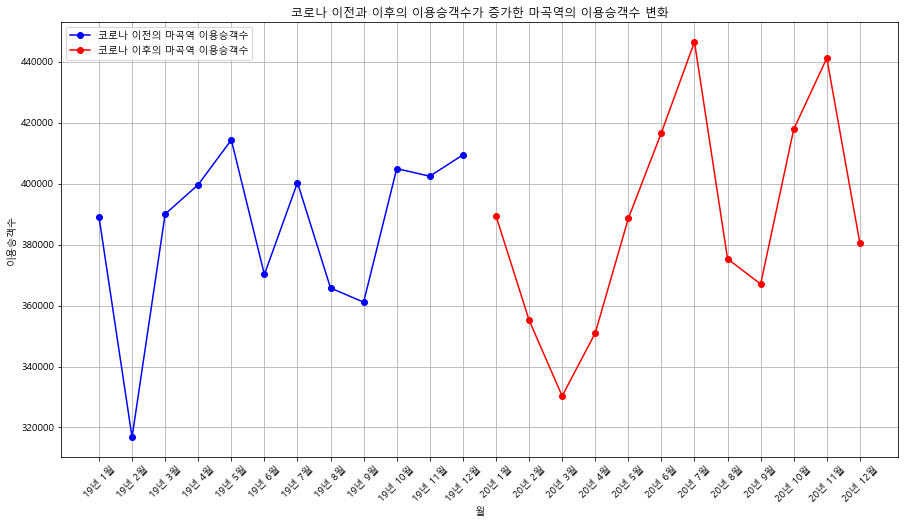

In [445]:
for i in range(len(list(df_sub.index))):
    user_ls = list(df_sub_concat[df_sub_concat.index == list(df_sub.index)[i]]['이용승객수'])
    if len(user_ls) <= 24:
        for j in range(24-len(user_ls)):
            user_ls.insert(0,0)
            
    plt.figure(figsize = (15,8))
    plt.title('코로나 이전과 이후의 이용승객수가 증가한 {}역의 이용승객수 변화'.format(list(df_sub.index)[i]))
    plt.plot(list(range(1,13)), user_ls[:12],
             'bo-',label = '코로나 이전의 {}역 이용승객수'.format(list(df_sub.index)[i]))
    plt.plot(list(range(13,25)), user_ls[12:],
             'ro-',label = '코로나 이후의 {}역 이용승객수'.format(list(df_sub.index)[i]))
    plt.xticks(list(range(1,25)),labels = xindex_24, rotation = 45)
    plt.xlabel('월')
    plt.ylabel('이용승객수')
    plt.grid(True)
    plt.legend()
    plt.show()

   + 코로나 이전에 비하여 코로나 이후의 이용승객수가 증가한 버스정류장/역을 시각화하면 전체적으로 우 상향 그래프를 그릴 수 있음을 확인하였다.
   + 이용승객수가 증가한 버스정류장/역에 대하여 조사한 결과, 버스정류장 일부의 경우에 대해서 코로나임시선별소, 코로나 검사장 등으로 인해 증가한 경우가 있지만 대부분의 경우 재개발/신도시 개발 등으로 인해 이용승객수가 늘어났음을 확인하였다.

### 6. 월별 코로나 확진자 수와 코로나 이후 이용승객수가 증가한 주요 정류장/역의 상관관계 분석
   + 코로나 이후의 이용승객수가 증가한 주요 정류장/역과 월별 코로나 확진자 수의 상관관계를 분석한다.
   + 월별 코로나 현황 파악을 위해 마찬가지로 보건복지부에서 제공하는 일별 코로나 현황 데이터 셋을 이용한다.
   + 이미 4.절에서 월별 코로나 확진자 수를 리스트(ls_decide)로 만들어 놨으므로 이를 이용한다.
   + 코로나 이후 이용자 수가 증가한 정류한/역에 대해서 상관 관계를 시각화한다.

<Figure size 1080x576 with 0 Axes>

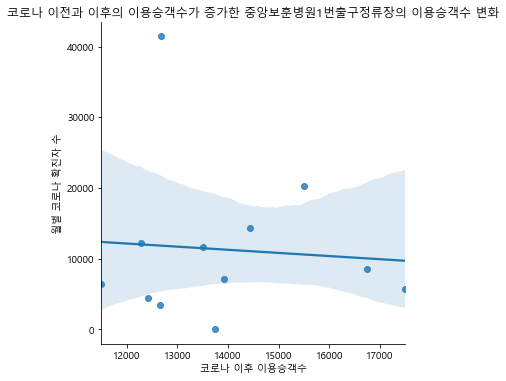

<Figure size 1080x576 with 0 Axes>

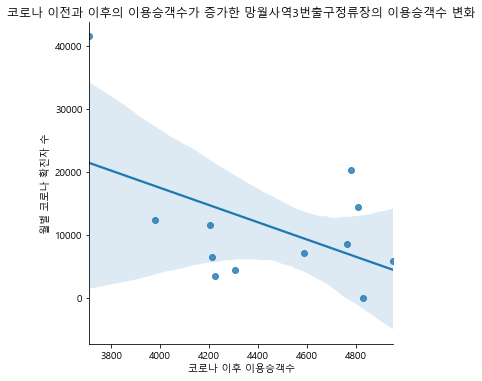

<Figure size 1080x576 with 0 Axes>

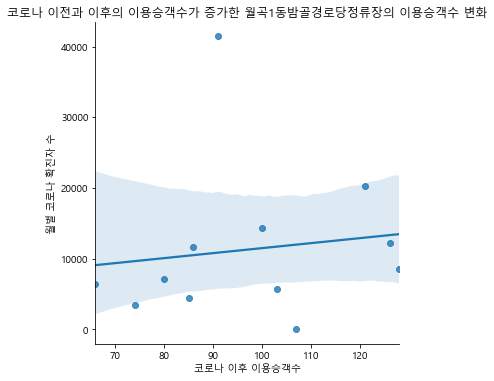

<Figure size 1080x576 with 0 Axes>

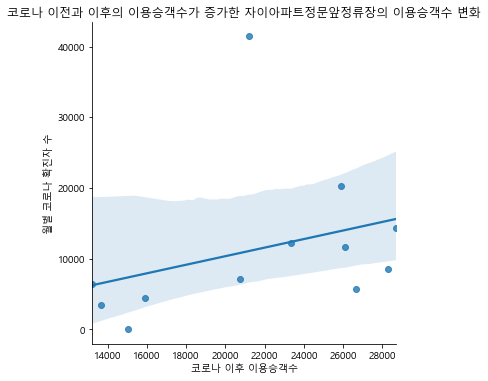

<Figure size 1080x576 with 0 Axes>

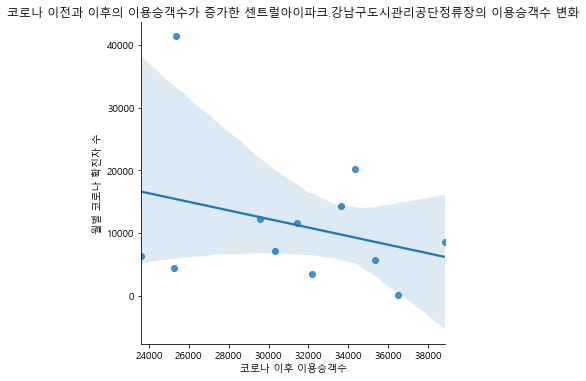

<Figure size 1080x576 with 0 Axes>

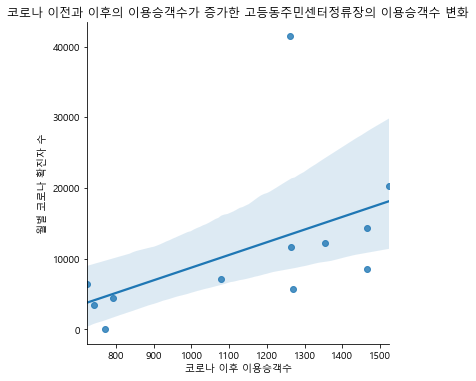

<Figure size 1080x576 with 0 Axes>

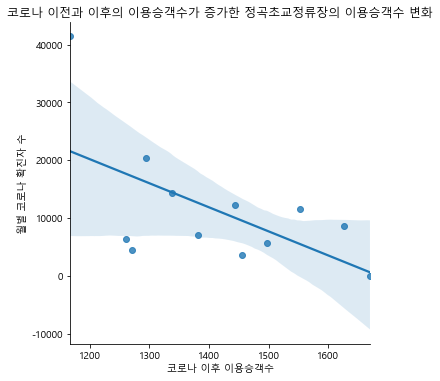

<Figure size 1080x576 with 0 Axes>

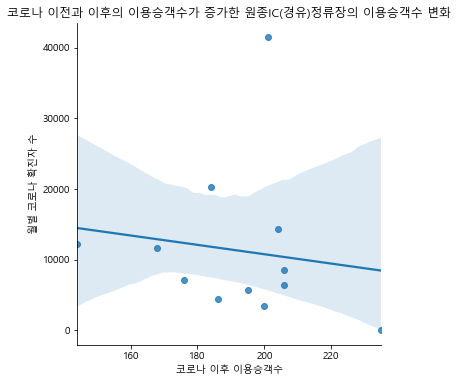

<Figure size 1080x576 with 0 Axes>

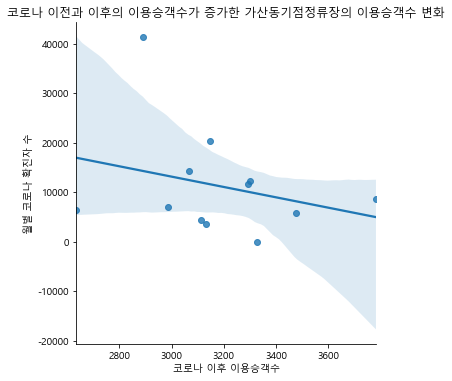

<Figure size 1080x576 with 0 Axes>

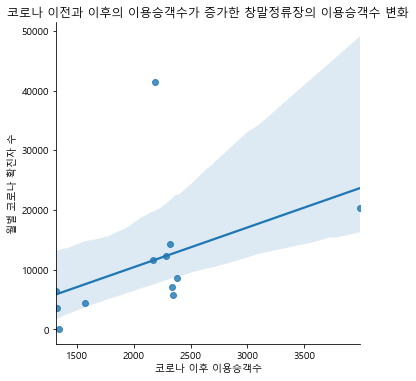

In [443]:
for i in range(len(list(df_bus.index))):
    user_ls = list(df_bus_concat[df_bus_concat.index == list(df_bus.index)[i]]['이용승객수'])
    if len(user_ls) <= 24:
        for j in range(24-len(user_ls)):
            user_ls.insert(0,0)
    corr_df_temp = pd.DataFrame({'월별 코로나 확진자 수': ls_decide, 
                                 '코로나 이후 이용승객수': user_ls[12:]})
    plt.figure(figsize = (15,8))
    sns.lmplot(x ='코로나 이후 이용승객수', y= '월별 코로나 확진자 수', data = corr_df_temp)
    plt.title('코로나 이전과 이후의 이용승객수가 증가한 {}정류장의 이용승객수 변화'.format(list(df_bus.index)[i]))
    
    plt.show()

   + 지하철에 대해서도 같은 과정을 수행한다.

<Figure size 1080x576 with 0 Axes>

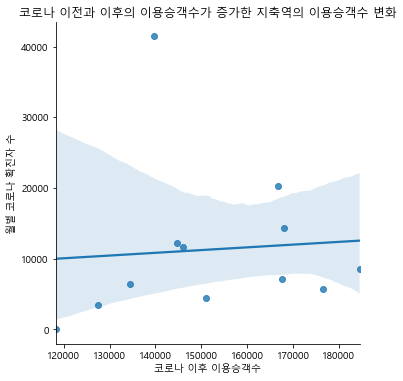

<Figure size 1080x576 with 0 Axes>

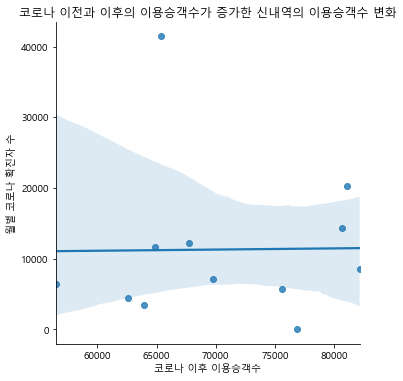

<Figure size 1080x576 with 0 Axes>

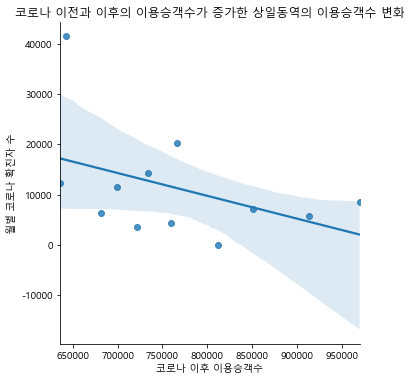

<Figure size 1080x576 with 0 Axes>

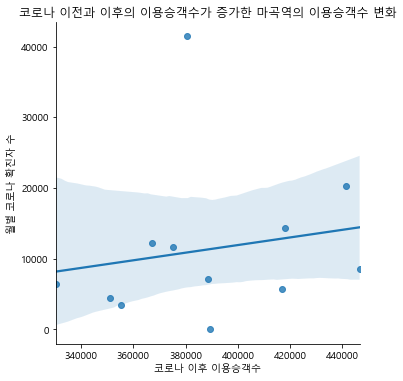

In [447]:
for i in range(len(list(df_sub.index))):
    user_ls = list(df_sub_concat[df_sub_concat.index == list(df_sub.index)[i]]['이용승객수'])
    if len(user_ls) <= 24:
        for j in range(24-len(user_ls)):
            user_ls.insert(0,0)
    corr_df_temp = pd.DataFrame({'월별 코로나 확진자 수': ls_decide, 
                                 '코로나 이후 이용승객수': user_ls[12:]})
    plt.figure(figsize = (15,8))
    sns.lmplot(x ='코로나 이후 이용승객수', y= '월별 코로나 확진자 수', data = corr_df_temp)
    plt.title('코로나 이전과 이후의 이용승객수가 증가한 {}역의 이용승객수 변화'.format(list(df_sub.index)[i]))
    
    plt.show()

   + 음의 상관 관계를 그리는 코로나와 대중교통 이용량과 달리, 일부 이용승객수가 늘어난 일부 정류장, 역에 대하여 양의 상관 관계를 보이는 곳도 있음을 확인 할 수 있다.

### 7. 코로나 이후 이용승객수가 감소한 주요 정류장/역
   + 코로나 이후 이용승객수가 감소한 정류장/역을 분석하기 위해 5.절에서와 마찬가지로 정류장/역 단위로 연합계를 계산하여 코로나 이전과 이후를 비교하여 시각화한다.
   + 주요 정류장/역은 이용승객수의 비율이 가장 높게 감소한 상위 10개 정류장/역에 대하여 시각화 한다.
   + 7.절에서는 이용량이 증가한 주요 정류장/역에 대하여 시각화 한다.

In [3]:
df_bus_before = pd.DataFrame()
df_bus_after = pd.DataFrame()
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                       sheet_name = '버스정류장별 이용현황')
    for j in range(len(df)):
        df['승차승객수'][j] = int(df['승차승객수'][j].replace(',','')) + int(df['하차승객수'][j].replace(',',''))
    df = df[['버스정류장명','승차승객수']]
    df.rename(columns = {'승차승객수': '이용승객수'}, inplace = True)
    if i<len(dataset)/2:
        df_bus_before = pd.concat([df_bus_before,df])
    else:
        df_bus_after = pd.concat([df_bus_after,df])

   + 코로나 이전과 이후의 각 데이터프레임을 노선명 기준으로 그룹화하여 피봇테이블로 나타낸다.

In [4]:
df_bus_before = df_bus_before.groupby(df_bus_before['버스정류장명']).sum()
df_bus_after = df_bus_after.groupby(df_bus_after['버스정류장명']).sum()

   + 데이터프레임을 살펴보면 버스정류장의 차이가 있음을 알 수 있다. 이는 새로 만들어졌거나 사라진 버스정류장임을 유추 할 수 있다.
   + 해당 데이터 분석 과정에서는 2019년 2020년 모두 존재하는 버스정류장만을 분석하여 시각화한다.
   + 두 데이터프레임을 병합하고 결측치를 제거하면 2019년과 2020년에 모두 존재하는 버스정류장 만을 얻을 수있다.

In [5]:
df_bus_before.rename(columns={'이용승객수': '코로나 이전 이용승객수'}, inplace = True)
df_bus_after.rename(columns={'이용승객수': '코로나 이후 이용승객수'}, inplace = True)

In [31]:
df_bus = pd.merge(df_bus_before,
                   df_bus_after,
                  left_index = True,
                  right_index = True,
                  how = 'outer')
df_bus = df_bus.dropna()
df_bus

,코로나 이전 이용승객수,코로나 이후 이용승객수
버스정류장명,,
(구)단대동주민센터,160512.0,35967.0
11단지,83901.0,76617.0
123전자타운.2001아울렛,541368.0,377161.0
12번지건영아파트,274635.0,211084.0
13단지아파트입구,164801.0,146183.0
...,...,...
힐스테이트서울숲리버,105356.0,77032.0
힐스테이트송파.송파한라비발디,132705.0,76427.0
힐스테이트입구,44439.0,35201.0


   + 감소율에 대한 컬럼을 만들고 정렬하여 이용승객수가 감소한 상위 10개의 버스정류장을 분석하기 위해 시각화 한다.
   + 감소율 식은 아래의 수식을 따른다.
   $$감소율 = {{{코로나 이전 이용승객수-코로나 이후 이용승객수} \over 코로나 이전 이용승객수} * 100}$$
   
   
   + 버스정류장이 사라졌을 경우, 감소율이 지나치게 높게 나올 수 있다.
   + 일정 비율 이상의 감소율을 보이는 경우, 신뢰성이 떨어 질 수 있으므로, 적당한 비율 안에서의 감소율에 따른 테이블을 마스킹한다.

In [32]:
rate_dec = []
for i in range(len(df_bus)):
    rate_dec.append((df_bus.iloc[i][0]-df_bus.iloc[i][1])/df_bus.iloc[i][0]*100)

In [34]:
df_bus.loc[:,'감소율'] = rate_dec
# df_bus = df_bus['증가율']
df_bus = df_bus.sort_values(by='감소율',ascending = False)
df_bus = df_bus[df_bus['감소율'] <= 55][:10]
df_bus

,코로나 이전 이용승객수,코로나 이후 이용승객수,감소율
버스정류장명,,,
무역센터,1029935.0,702424.0,54.943676
마곡.수명산파크2단지,218652.0,146797.0,54.924983
갤러리아팰리스,447284.0,299553.0,54.633227
개봉고가,761710.0,647710.0,54.543774
서강대학교,753785.0,550945.0,54.538486
경남아파트앞,63821.0,46395.0,54.359382
개봉역,8236945.0,6366409.0,54.242966
율정초등학교,115761.0,90146.0,53.895670
탄현마을5.6단지,29834.0,27915.0,53.814632


In [26]:
df_bus_concat = pd.DataFrame()
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                       sheet_name = '버스정류장별 이용현황')
    for j in range(len(df)):
        df['승차승객수'][j] = int(df['승차승객수'][j].replace(',','')) + int(df['하차승객수'][j].replace(',',''))
    df = df[['버스정류장명','승차승객수']]
    df.rename(columns = {'승차승객수': '이용승객수'}, inplace = True)
    df = df.groupby(df['버스정류장명']).sum()
    df_bus_concat = pd.concat([df_bus_concat,df])
df_bus_concat

,이용승객수
버스정류장명,
(구)단대동주민센터,13475
(구)태풍약국,47745
11단지,7172
123전자타운.2001아울렛,43928
12번지건영아파트,23793
...,...
힐스테이트송파.송파더센트레,5800
힐스테이트신촌.신촌푸르지오1단지후문,12854
힐스테이트입구,2471


   + 정류장의 월별 이용량을 담은 리스트가 24 미만인 경우, 버스정류장의 신설, 폐지 등의 이유를 유추할 수 있다.
   + 본 절에서는 이용승객수가 감소한 정류장을 다루고 있으므로 폐지 버스정류장을 다루고 있을 것이다(실제로 확인 결과 '한화생명'정류장을 제외하고 모두 사라진 승강장임). 따라서, 24에서 적은 갯수 만큼 뒤에 0을 추가해 준다.

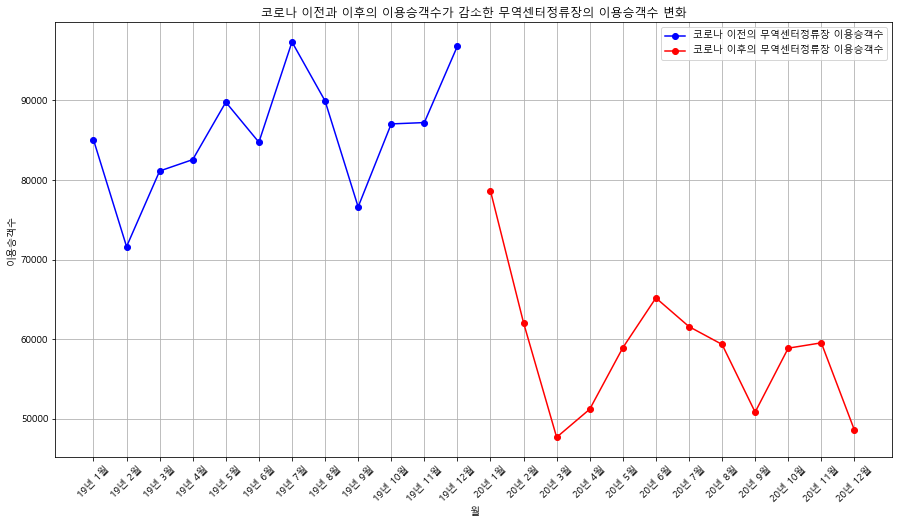

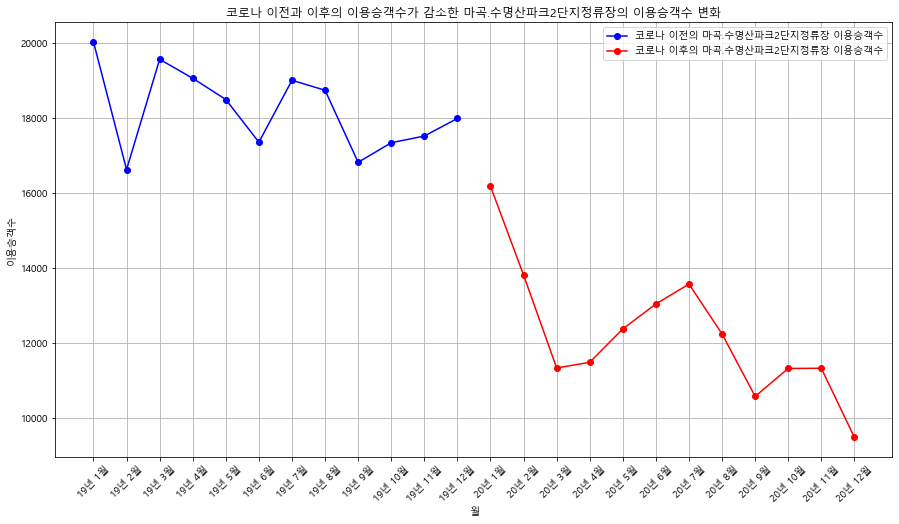

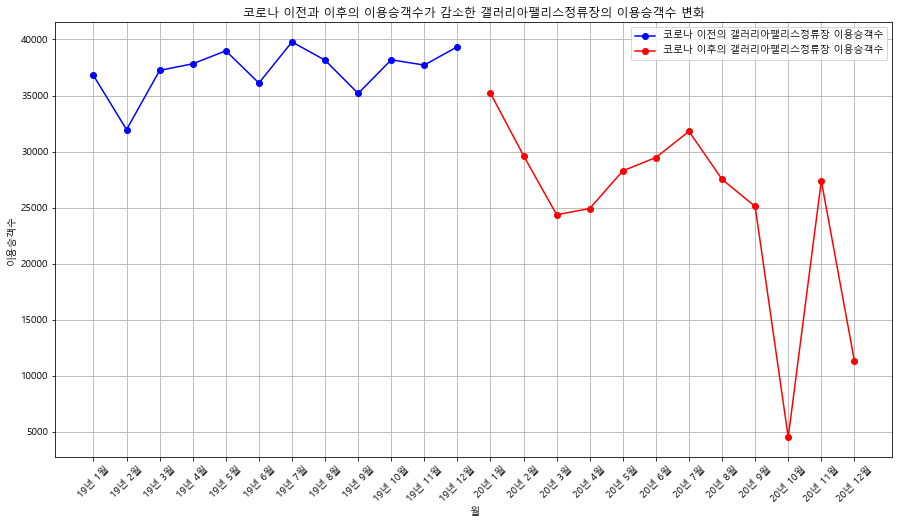

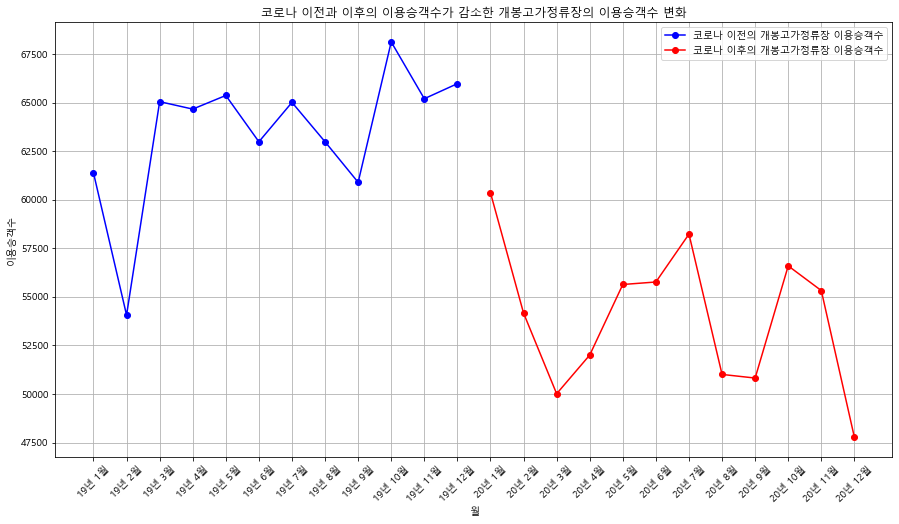

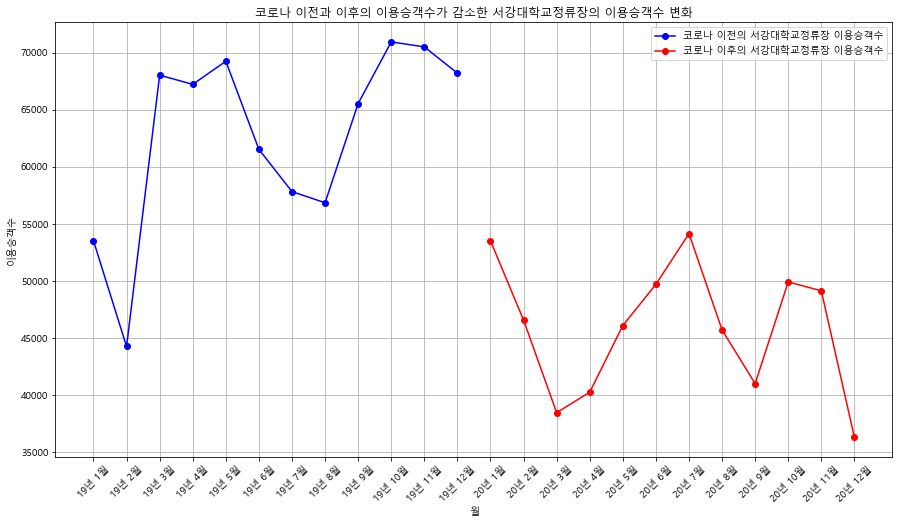

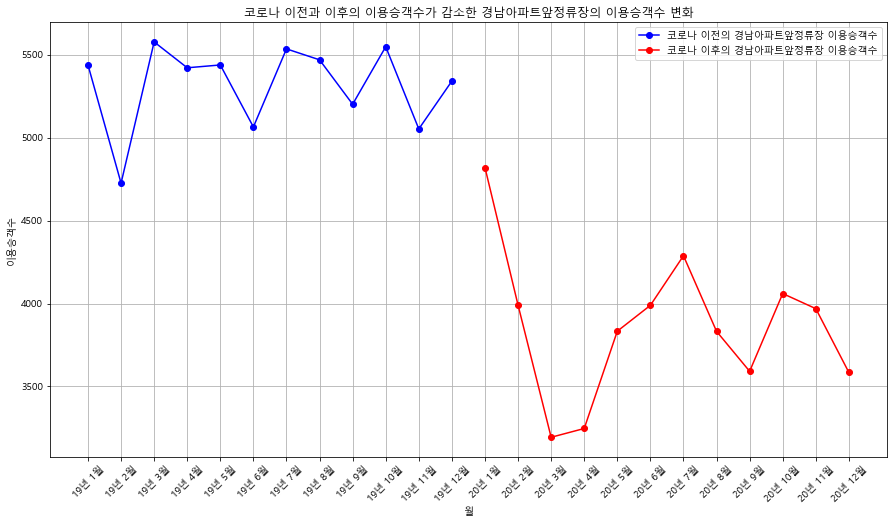

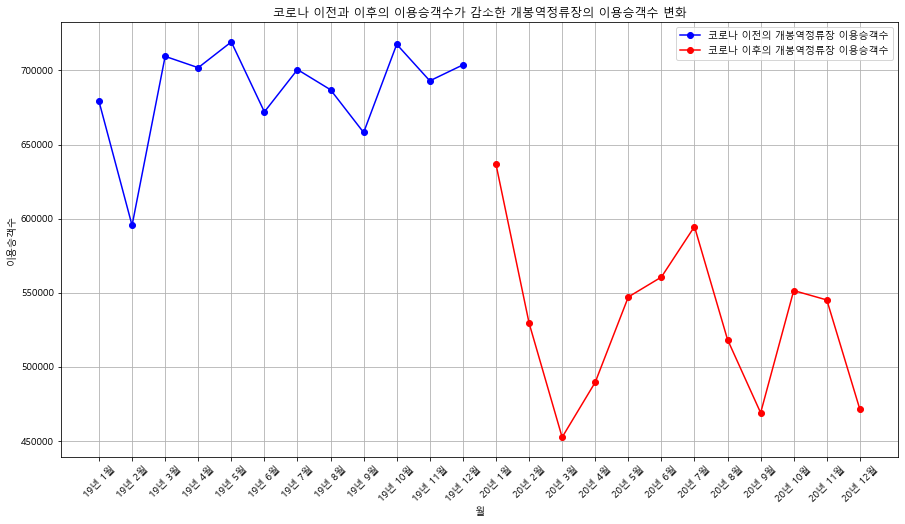

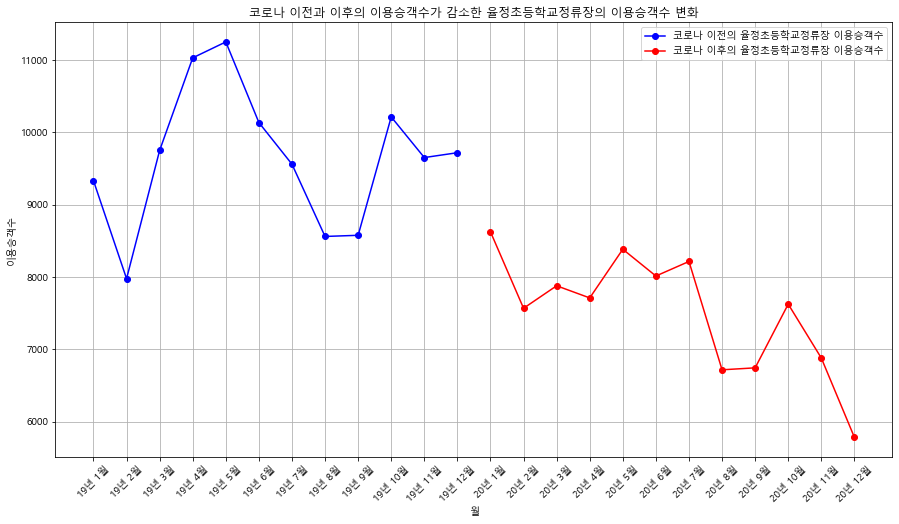

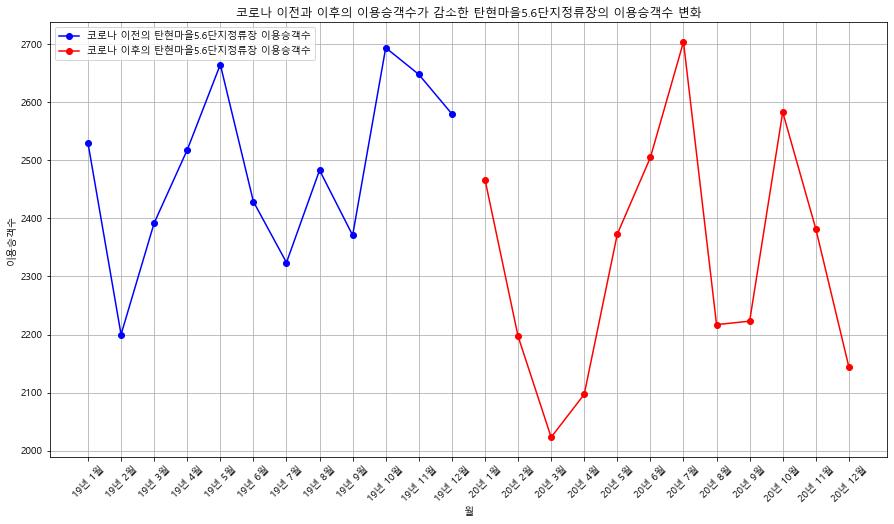

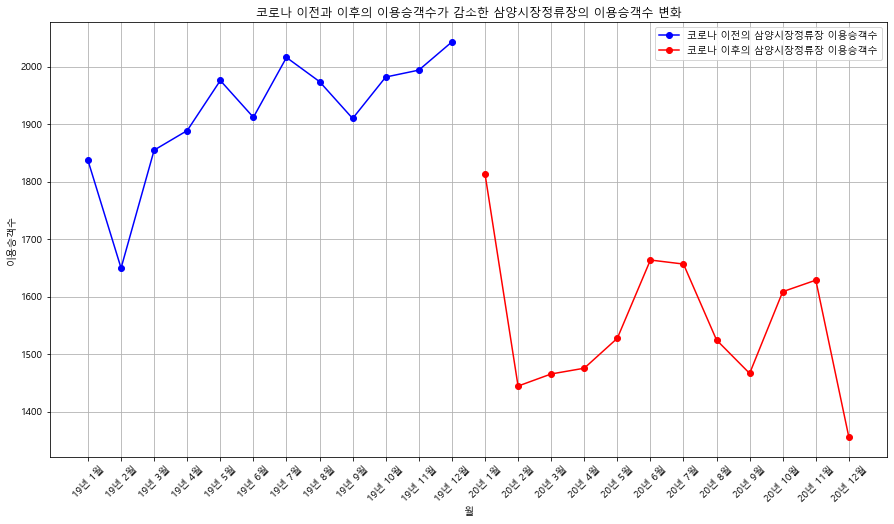

In [35]:
for i in range(len(list(df_bus.index))):
    user_ls = list(df_bus_concat[df_bus_concat.index == list(df_bus.index)[i]]['이용승객수'])
    if len(user_ls) <= 24:
        for j in range(24-len(user_ls)):
            user_ls.append(0)
            
    plt.figure(figsize = (15,8))
    plt.title('코로나 이전과 이후의 이용승객수가 감소한 {}정류장의 이용승객수 변화'.format(list(df_bus.index)[i]))
    plt.plot(list(range(1,13)), user_ls[:12],
             'bo-',label = '코로나 이전의 {}정류장 이용승객수'.format(list(df_bus.index)[i]))
    plt.plot(list(range(13,25)), user_ls[12:],
             'ro-',label = '코로나 이후의 {}정류장 이용승객수'.format(list(df_bus.index)[i]))
    plt.xticks(list(range(1,25)),labels = xindex_24, rotation = 45)
    plt.xlabel('월')
    plt.ylabel('이용승객수')
    plt.grid(True)
    plt.legend()
    plt.show()

   + 지하철에 대해서도 같은 과정을 수행해 준다.

In [36]:
df_sub_before = pd.DataFrame()
df_sub_after = pd.DataFrame()
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                       sheet_name = '지하철 노선별 역별 이용현황')
    for j in range(len(df)):
        df['승차승객수'][j] = int(df['승차승객수'][j].replace(',','')) + int(df['하차승객수'][j].replace(',',''))
    df = df[['지하철역','승차승객수']]
    df.rename(columns = {'승차승객수': '이용승객수'}, inplace = True)
    if i<len(dataset)/2:
        df_sub_before = pd.concat([df_sub_before,df])
    else:
        df_sub_after = pd.concat([df_sub_after,df])

In [37]:
df_sub_before = df_sub_before.groupby(df_sub_before['지하철역']).sum()
df_sub_after = df_sub_after.groupby(df_sub_after['지하철역']).sum()

In [38]:
df_sub_before.rename(columns={'이용승객수': '코로나 이전 이용승객수'}, inplace = True)
df_sub_after.rename(columns={'이용승객수': '코로나 이후 이용승객수'}, inplace = True)

In [54]:
df_sub = pd.merge(df_sub_before,
                   df_sub_after,
                  left_index = True,
                  right_index = True,
                  how = 'outer')
df_sub = df_sub.dropna()
df_sub

,코로나 이전 이용승객수,코로나 이후 이용승객수
지하철역,,
4.19민주묘지,2311025.0,1633446
가능,5129442.0,3864010
가락시장,13359150.0,10356732
가산디지털단지,41604306.0,35629468
가양,14998388.0,11772614
...,...,...
회기,21309849.0,14070540
회룡,9622387.0,7348478
회현(남대문시장),22915748.0,14056723


In [55]:
rate_dec = []
for i in range(len(df_sub)):
    rate_dec.append((df_sub.iloc[i][0]-df_sub.iloc[i][1])/df_sub.iloc[i][0]*100)

In [56]:
df_sub.loc[:,'감소율'] = rate_dec
df_sub = df_sub.sort_values(by='감소율',ascending = False)
df_sub = df_sub[df_sub['감소율'] <= 80][:10]
df_sub

,코로나 이전 이용승객수,코로나 이후 이용승객수,감소율
지하철역,,,
경마공원,5026532.0,1253285,75.066607
인천공항1터미널,12075476.0,3557783,70.537120
개화,3553588.0,1298640,63.455527
인천공항2터미널,3940779.0,1532114,61.121545
명동,29082880.0,12154029,58.208991
대공원,3840130.0,1810033,52.865320
이대,14912763.0,7578942,49.178150
화전,1843896.0,940478,48.995063
한양대,8645273.0,4432981,48.723644


In [52]:
df_sub_concat = pd.DataFrame()
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                       sheet_name = '지하철 노선별 역별 이용현황')
    for j in range(len(df)):
        df['승차승객수'][j] = int(df['승차승객수'][j].replace(',','')) + int(df['하차승객수'][j].replace(',',''))
    df = df[['지하철역','승차승객수']]
    df.rename(columns = {'승차승객수': '이용승객수'}, inplace = True)
    df = df.groupby(df['지하철역']).sum()
    df_sub_concat = pd.concat([df_sub_concat,df])
df_sub_concat

,이용승객수
지하철역,
4.19민주묘지,153416
가능,408269
가락시장,1162954
가산디지털단지,3640019
가양,1240173
...,...
회기,1001485
회룡,539812
회현(남대문시장),991103


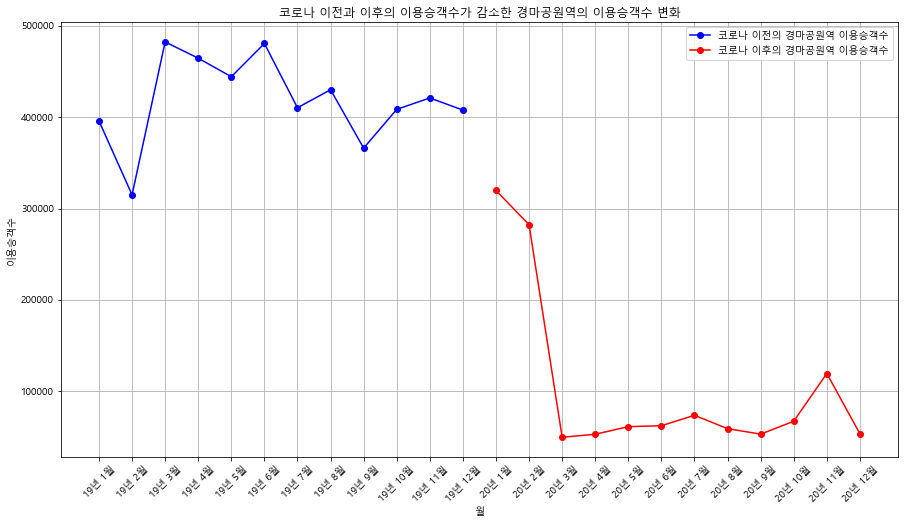

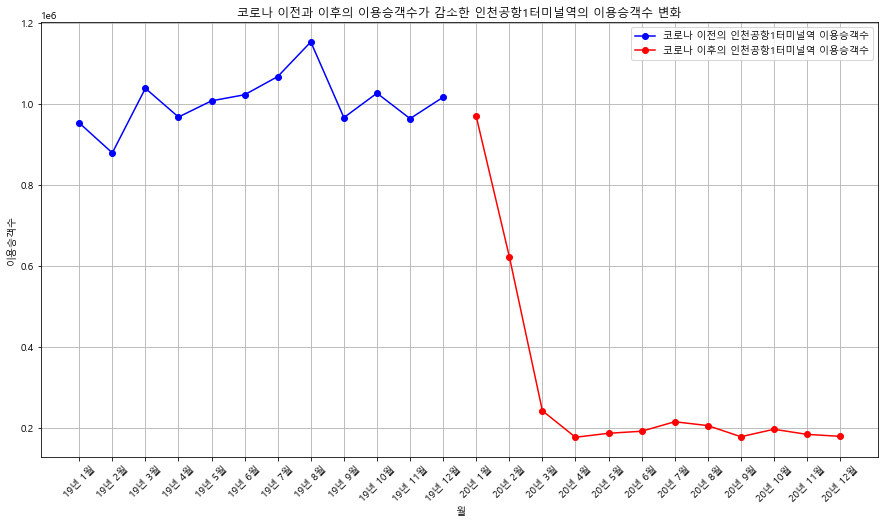

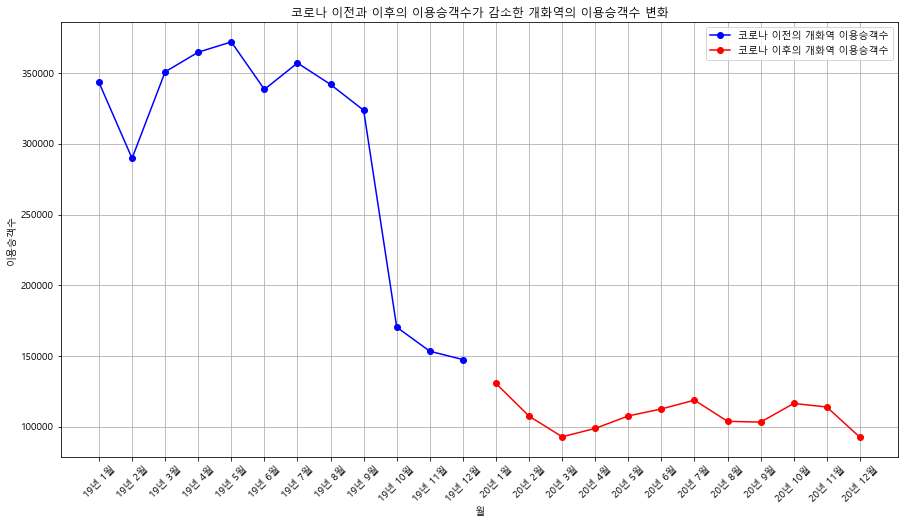

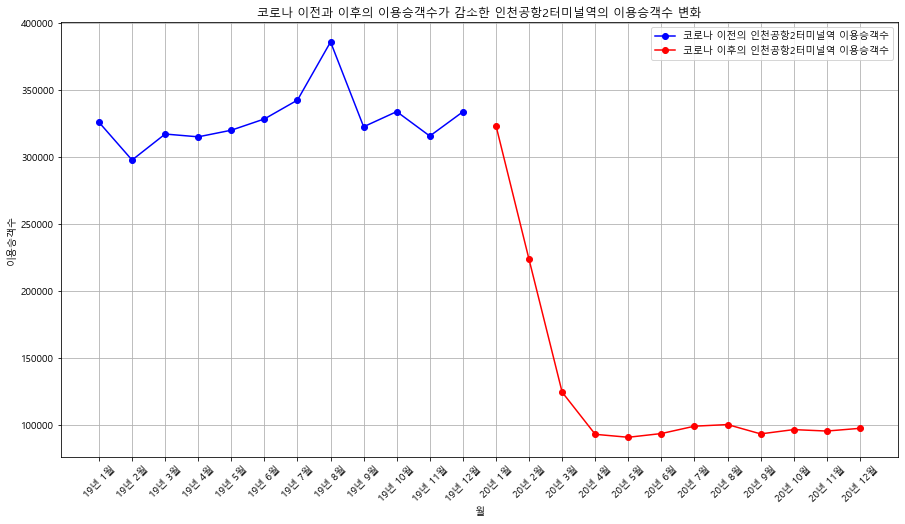

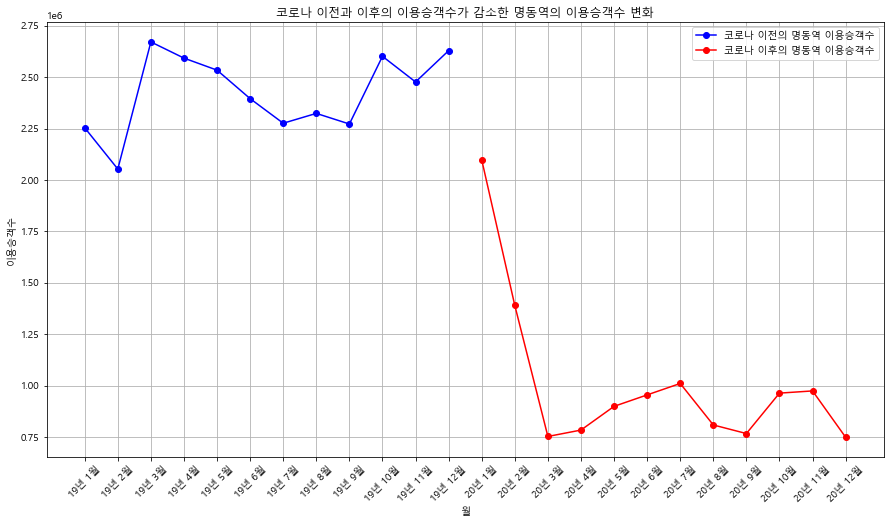

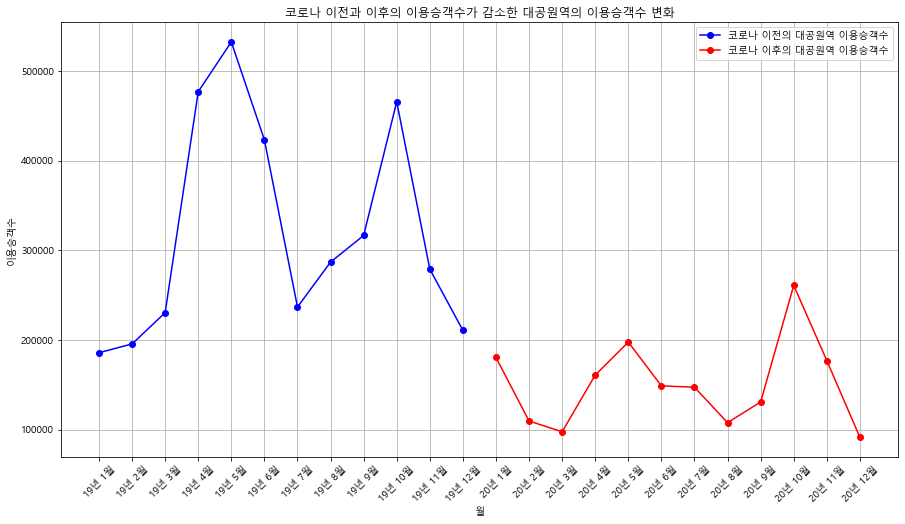

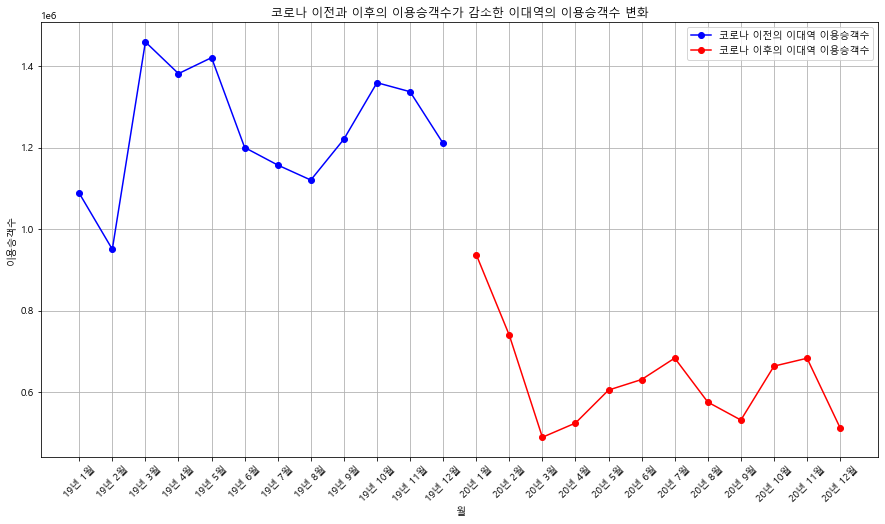

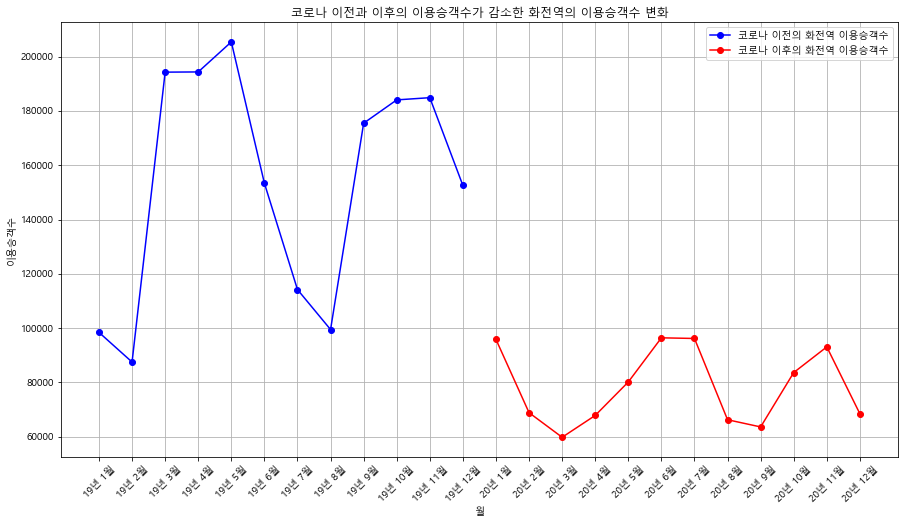

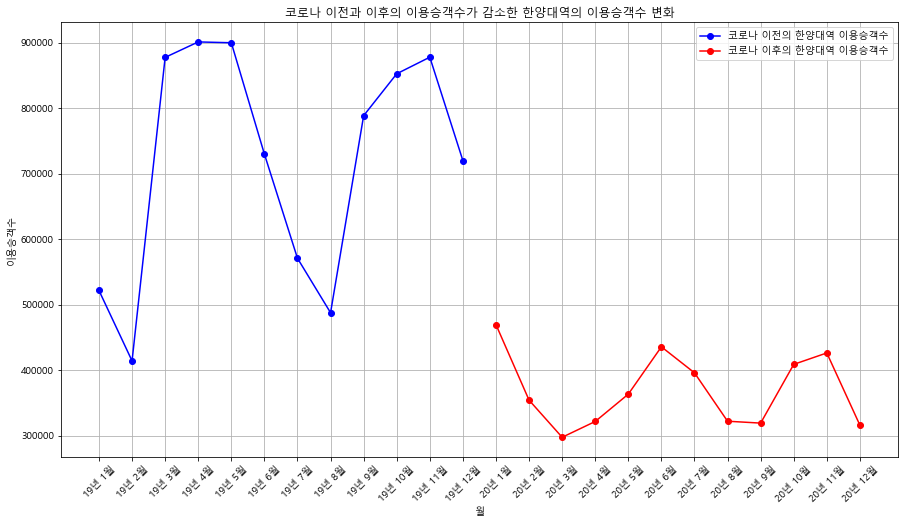

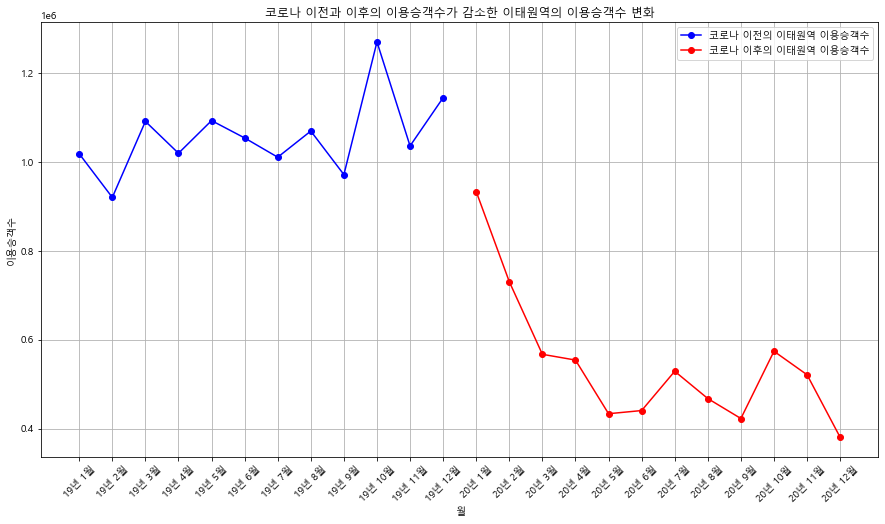

In [57]:
for i in range(len(list(df_sub.index))):
    user_ls = list(df_sub_concat[df_sub_concat.index == list(df_sub.index)[i]]['이용승객수'])
    if len(user_ls) <= 24:
        for j in range(24-len(user_ls)):
            user_ls.append(0)
            
    plt.figure(figsize = (15,8))
    plt.title('코로나 이전과 이후의 이용승객수가 감소한 {}역의 이용승객수 변화'.format(list(df_sub.index)[i]))
    plt.plot(list(range(1,13)), user_ls[:12],
             'bo-',label = '코로나 이전의 {}역 이용승객수'.format(list(df_sub.index)[i]))
    plt.plot(list(range(13,25)), user_ls[12:],
             'ro-',label = '코로나 이후의 {}역 이용승객수'.format(list(df_sub.index)[i]))
    plt.xticks(list(range(1,25)),labels = xindex_24, rotation = 45)
    plt.xlabel('월')
    plt.ylabel('이용승객수')
    plt.grid(True)
    plt.legend()
    plt.show()

   + 코로나 이전에 비하여 코로나 이후의 이용승객수가 감소한 버스정류장/역을 시각화하면 전체적으로 좌 상향 그래프를 그릴 수 있음을 확인하였다.
   + 이용승객수가 감소한 버스정류장/역에 대하여 조사한 결과, 대부분의 경우에 대해서 학교의 비대면 수업, 시장의 이용량 저하, 재택근무, 대학가 이용량 감소, 문화시설 이용 불가 및 단축 등으로 인해 감소하였음을 확인하였다.

### 8. 월별 코로나 확진자 수와 코로나 이후 이용승객수가 감소한 주요 정류장/역의 상관관계 분석
   + 코로나 이후의 이용승객수가 감소한 주요 정류장/역과 월별 코로나 확진자 수의 상관관계를 분석한다.
   + 월별 코로나 현황 파악을 위해 마찬가지로 보건복지부에서 제공하는 일별 코로나 현황 데이터 셋을 이용한다.
   + 이미 4.절에서 월별 코로나 확진자 수를 리스트(ls_decide)로 만들어 놨으므로 이를 이용한다.
   + 코로나 이후 이용자 수가 감소한 정류한/역에 대해서 상관 관계를 시각화한다.

<Figure size 1080x576 with 0 Axes>

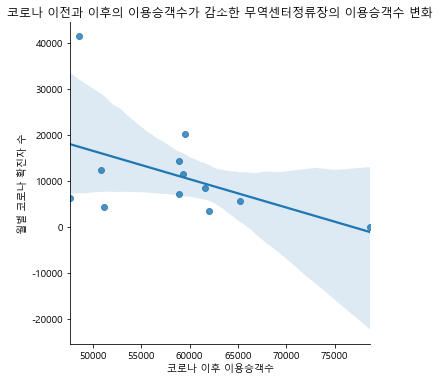

<Figure size 1080x576 with 0 Axes>

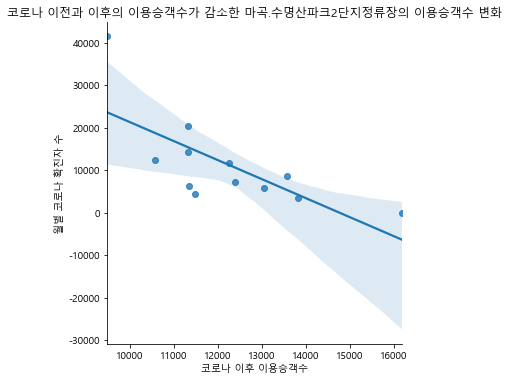

<Figure size 1080x576 with 0 Axes>

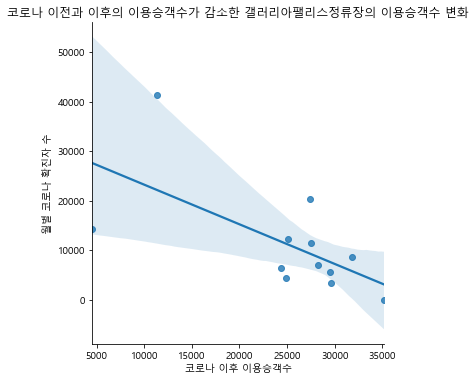

<Figure size 1080x576 with 0 Axes>

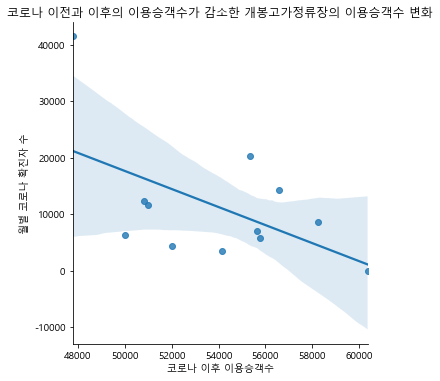

<Figure size 1080x576 with 0 Axes>

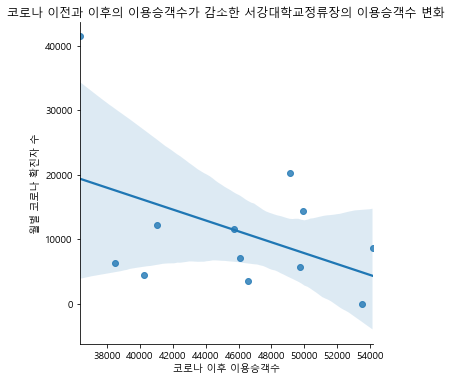

<Figure size 1080x576 with 0 Axes>

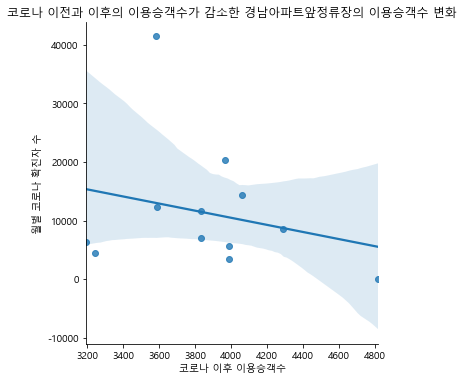

<Figure size 1080x576 with 0 Axes>

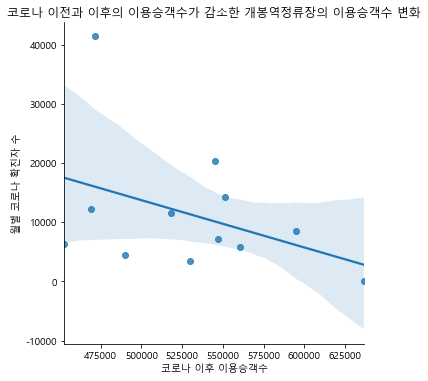

<Figure size 1080x576 with 0 Axes>

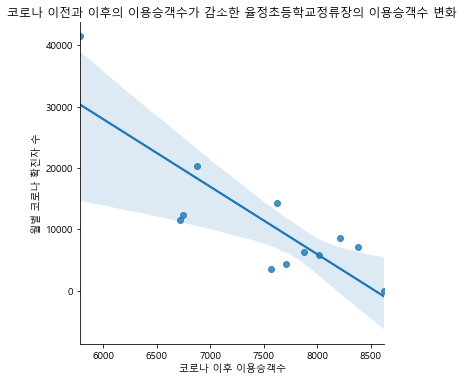

<Figure size 1080x576 with 0 Axes>

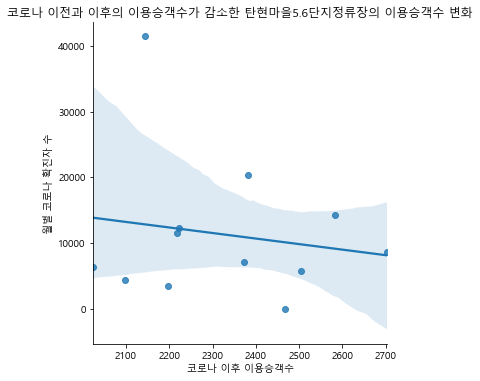

<Figure size 1080x576 with 0 Axes>

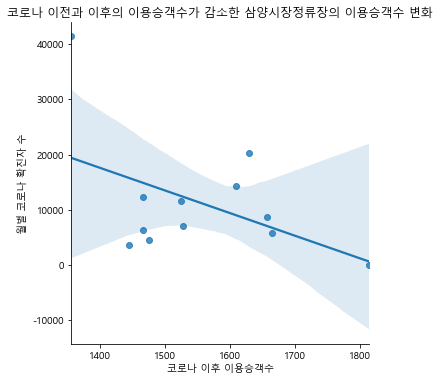

In [61]:
for i in range(len(list(df_bus.index))):
    user_ls = list(df_bus_concat[df_bus_concat.index == list(df_bus.index)[i]]['이용승객수'])
    if len(user_ls) <= 24:
        for j in range(24-len(user_ls)):
            user_ls.insert(0,0)
    corr_df_temp = pd.DataFrame({'월별 코로나 확진자 수': ls_decide, 
                                 '코로나 이후 이용승객수': user_ls[12:]})
    plt.figure(figsize = (15,8))
    sns.lmplot(x ='코로나 이후 이용승객수', y= '월별 코로나 확진자 수', data = corr_df_temp)
    plt.title('코로나 이전과 이후의 이용승객수가 감소한 {}정류장의 이용승객수 변화'.format(list(df_bus.index)[i]))
    
    plt.show()

<Figure size 1080x576 with 0 Axes>

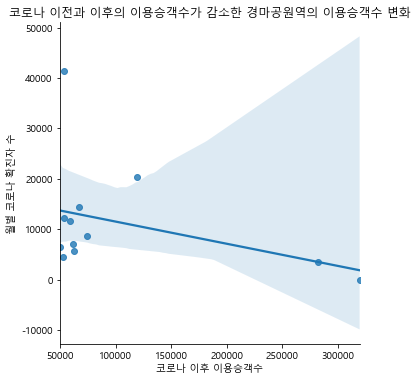

<Figure size 1080x576 with 0 Axes>

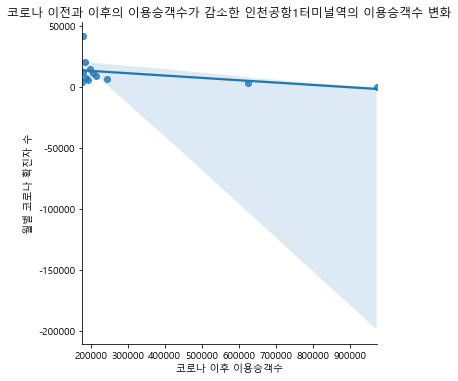

<Figure size 1080x576 with 0 Axes>

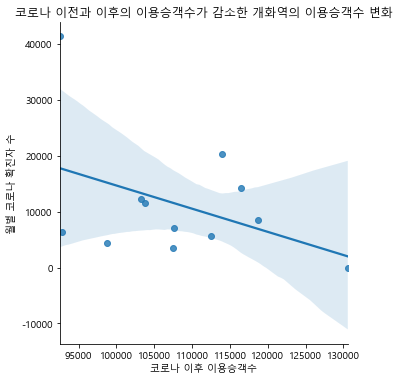

<Figure size 1080x576 with 0 Axes>

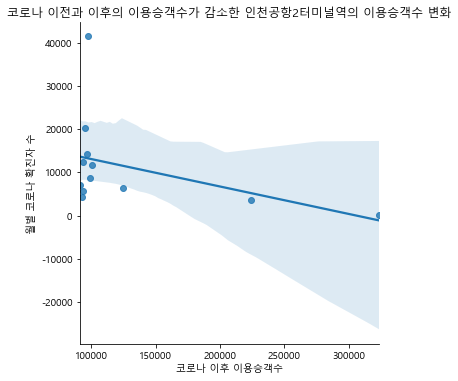

<Figure size 1080x576 with 0 Axes>

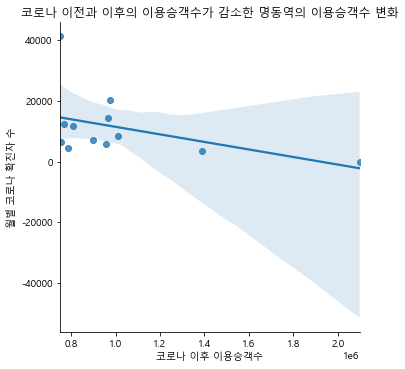

<Figure size 1080x576 with 0 Axes>

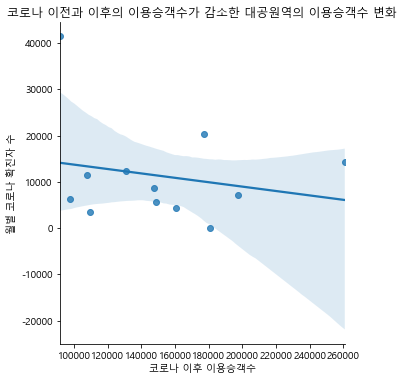

<Figure size 1080x576 with 0 Axes>

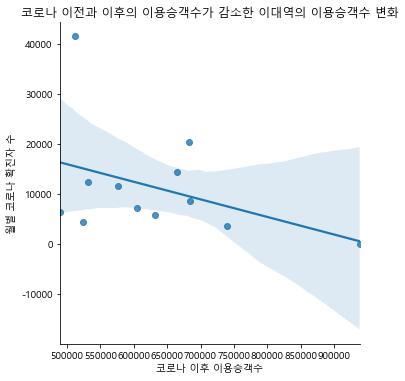

<Figure size 1080x576 with 0 Axes>

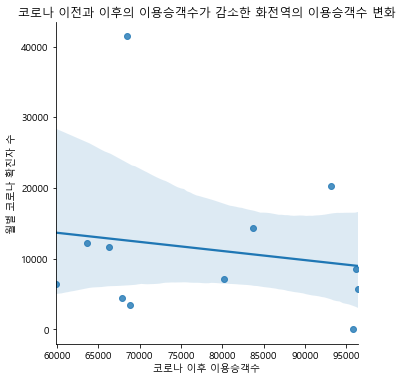

<Figure size 1080x576 with 0 Axes>

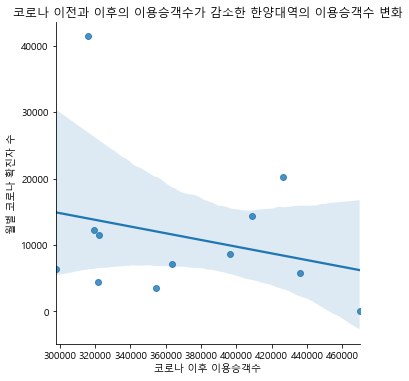

<Figure size 1080x576 with 0 Axes>

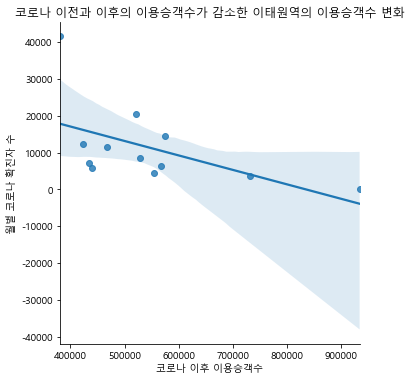

In [62]:
for i in range(len(list(df_sub.index))):
    user_ls = list(df_sub_concat[df_sub_concat.index == list(df_sub.index)[i]]['이용승객수'])
    if len(user_ls) <= 24:
        for j in range(24-len(user_ls)):
            user_ls.insert(0,0)
    corr_df_temp = pd.DataFrame({'월별 코로나 확진자 수': ls_decide, 
                                 '코로나 이후 이용승객수': user_ls[12:]})
    plt.figure(figsize = (15,8))
    sns.lmplot(x ='코로나 이후 이용승객수', y= '월별 코로나 확진자 수', data = corr_df_temp)
    plt.title('코로나 이전과 이후의 이용승객수가 감소한 {}역의 이용승객수 변화'.format(list(df_sub.index)[i]))
    
    plt.show()

   + 음의 상관관계를 그리는 코로나와 대중교통 이용량과 동일하게 이용승객수가 감소한 정류장, 역에 대하여 일관성 있게 음의 상관 관계를 보여주는 것을 확인 할 수 있다.

### 9. 결론: 코로나 1년이 대중교통 이용량에 준 영향은 어떠한가?

1. 대중교통의 주요 정류장/역별 이용 현황
  + 대중교통의 이용량이 많은 버스정류장은 미아사거리역 정류장, 구로디지털단지역 정류장, 홍대입구역 정류장 등 순으로 나타남을 확인하였다.
  + 버스 정류장의 경우 구로디지털단지역 환승센터를 제외하고 지하철 역인근의 정류장의 이용승객수가 높게 나타났다.
  + 대중교통 이용량이 많은 지하철 역은 잠실, 강남, 고속터미널, 선릉역 순으로 나타남을 확인하였다.
  + 지하철 역의 경우 기본적으로 도심에 있으면서 다른 여러 호선으로 환승이 가능한 지하철역들이 주로 이용승객수가 높게 나타났다.
  
2. 대중교통 주요 버스 노선/지하철 호선별 이용 현황
  + 대중교통의 이용량이 많은 버스노선은 정릉 ~ 개포동을 잇는 143번, 화계사 ~ 삼막사 사거리를 잇는 152번 등 순으로 나타남을 확인하였다.
  + 버스 노선이 지나는 버스 정류장을 조사한 결과, 대부분 이용 승객수가 많은 정류장을 지나는 버스 노선의 이용승객수가 높게 나타남을 확인할 수 있었다.
  + 지하철 역의 경우 2호선, 7호선, 5호선 순으로 이용량이 높게 나타남을 확인할 수 있었다.
  + 특히 서울 중심의 주요지역을 순환하는 2호선의 이용승객수가 다른 호선에 비해 월등히 높게 나타났다.

3. 코로나 전/후의 대중교통 이용량 변화
  + 버스와 지하철 모두 유사한 형태의 이용량 변화를 보여준다.
  + 버스와 지하철 모두 코로나 이전의 이용승객수보다 낮게 나타났으며, 특히 2020년 1월 ~ 2020년 3월 그리고 2020년 12월에 눈에띄게 감소했음을 확인할 수 있다.
  + 코로나 이후의 월별 대중교통 이용량은 버스와 지하철 모두 12달 모두 이용량이 감소하였음을 확인할 수 있다.
  
4. 월별 코로나 확진자 수와 대중교통 이용량의 상관관계 분석
  + 보건복지부에서 제공하는 일별 코로나 현황 데이터셋을 이용하여 코로나 확진자 수와 대중교통 이용량의 상관관계를 분석한다.
  + 버스와 지하철 모두 음의 상관관계를 갖는 그래프를 보여줌을 확인하였다. 즉, 코로나 확진자 수가 증가 할 수록, 대중교통 이용량은 감소한다.

5. 코로나 이후 이용승객수가 증가한 주요 정류장/역
  + 코로나로 인해 이용승객수가 증가한 일부 정류장은 병원, 임시선별소 인근에 있는 정류장임을 볼 수 있다.
  + 하지만, 일부 정류장을 제외하고 다른 모든 정류장/역은 조사 결과 재개발, 신도시개발 등의 이유가 있음을 확인하였다.
  
6. 월별 코로나 확진자 수와 코로나 이후 이용승객수가 증가한 주요 정류장/역의 상관관계 분석
  + 월별 코로나 확진자 수와 버스/지하철 이용승객수 간의 상관관계가 음의 상관관계 그래프를 보여줌과 달리, 일부 정류장과 역에 대해서는 양의 상관관계를 보여주는 그래프 또한 볼 수 있다.
  + 즉, 이용량이 증가한 정류장/역의 이용승객수와 코로나 확진자 수의 상관관계는 없거나, 적음을 알 수 있다.
  
7. 코로나 이후 이용승객수가 감소한 주요 정류장/역
  + 코로나로 인해 이용승객수가 감소한 정류장/역은 주로 학교, 대학가, 시장, 공원, 문화시설 임을 볼 수 있다.
  + 이들은 주로 비대면 수업, 재택 근무, 코로나로 인한 이동 감소, 문화시설 이용시간 단축 등의 이유임을 유추할 수 있다.
  
8. 월별 코로나 확진자 수와 코로나 이후 이용승객수가 감소한 주요 정류장/역의 상관관계 분석
  + 월별 코로나 확진자 수와 버스/지하철 이용승객수 간의 상관관계가 음의 상관관계 그래프를 보여주는 것과 동일하게, 모든 정류장과 역에 대해서 일관되게 음의 상관관계를 보여주는 그래프를 볼 수 있다.
  + 즉, 이용량이 감소한 정류장/역의 이용승객수와 코로나 확진자 수의 상관관계는 높음을 알 수 있다.

9. 결론: 코로나 1년이 대중교통 이용량에 준 영향은 어떠한가?
  + 코로나 1년으로 인해 전체적인 대중교통 이용량은 감소하는 모습을 보여주었다.
  + 코로나 이후에 이용승객수가 증가하는 정류장/역도 존재하지만 이들은 재개발, 신도시개발 등의 이유이며, 코로나와는 밀접한 관계를 갖지 않는다.
  + 주로 학교, 대학가, 시장, 공원, 문화시설 등과 밀접한 정류장/역의 이용량이 감소하였으며, 이들의 이용승객수와 월별 코로나 확진자 수의 상관관계는 음의 상관관계의 모습을 보여주었다.
  + 즉, 코로나 확진자 수가 증가할 수록 학교, 대학가, 시장, 공원, 문화시설 등과 밀접한 정류장/역의 이용량은 감소한다.
  + 이를 통해, 대중교통에 코로나가 미친 영향과 집중적으로 영향을 준 장소 유형 또한 확인할 수 있다.